# HYDROPOWER ENERGY CONSUMPTION PREDICTION

### Loading all the Libraries 

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [7]:
Hydropower_new = pd.read_excel('use_renew_sector.xlsx',sheet_name='Hydropower', header=1, index_col=0)

In [8]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Hydropower_new.columns = Hydropower_new.iloc[0]
Hydropower = Hydropower_new[1:-1]
print(Hydropower)

State    1960    1961    1962    1963    1964    1965    1966    1967    1968  \
AK       3120    3168    3207    3410    3374    3655    3293    3786    3781   
AL      67128   71851   79605   66918   91651   74247   72135   95334   76753   
AR      10671   14854   11197    5168    5872   11291   16528   12815   31247   
AZ      32169   31246   30861   30834   30182   46400   54380   52243   59309   
CA     187705  163670  241087  265551  231188  319052  273247  368007  282561   
CO      10436    8900   10724   10839   11049    9800   10398    9685    9814   
CT       4564    3907    3112    2915    2817    1959    2631    4108    3727   
DC         32      58      61      43      50      32      23      24      15   
DE          0       0       0       0       0       0       0       0       3   
FL       2990    2806    2505    2775    3033    3118    3022    2984    2511   
GA      24810   24375   27042   30763   45088   33808   34792   38645   32734   
HI        292     258     21

### Load the state abbrevation and divide the years to 6 decades.

In [16]:
# state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Select the columns for both time periods
Hydropower_1960_1970 = Hydropower.loc[:, '1960':'1970']
Hydropower_1970_1980 = Hydropower.loc[:, '1971':'1980']
Hydropower_1980_1990 = Hydropower.loc[:, '1981':'1990']
Hydropower_1990_2000 = Hydropower.loc[:, '1991':'2000']
Hydropower_2000_2010 = Hydropower.loc[:, '2001':'2010']
Hydropower_2010_2020 = Hydropower.loc[:, '2011':'2020']

# Calculate the average for each state over the specified years
average_1960_1970 = Hydropower_1960_1970.mean(axis=1)
average_1970_1980 = Hydropower_1970_1980.mean(axis=1)
average_1980_1990 = Hydropower_1980_1990.mean(axis=1)
average_1990_2000 = Hydropower_1990_2000.mean(axis=1)
average_2000_2010 = Hydropower_2000_2010.mean(axis=1)
average_2010_2020 = Hydropower_2010_2020.mean(axis=1)


### Load the states abbrevations and divide the years to 6 decades.

In [17]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]

for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)

    print(f"\nStates from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places 
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


States from 1960 to 1970:
State: Alaska - Value: 3469.27
State: Alabama - Value: 77656.82
State: Arkansas - Value: 15675.09
State: Arizona - Value: 45059.55
State: California - Value: 286721.73
State: Colorado - Value: 10452.73
State: Connecticut - Value: 3421.36
State: District of Columbia - Value: 31.73
State: Delaware - Value: 0.27
State: Florida - Value: 2878.82
State: Georgia - Value: 31913.09
State: Hawaii - Value: 795.55
State: Iowa - Value: 9083.09
State: Idaho - Value: 67279.45
State: Illinois - Value: 1869.55
State: Indiana - Value: 2518.0
State: Kansas - Value: 134.27
State: Kentucky - Value: 28831.27
State: Louisiana - Value: 0.0
State: Massachusetts - Value: 8264.55
State: Maryland - Value: 14305.0
State: Maine - Value: 27295.09
State: Michigan - Value: 18671.0
State: Minnesota - Value: 9945.45
State: Missouri - Value: 8860.82
State: Mississippi - Value: 0.0
State: Montana - Value: 79831.82
State: North Carolina - Value: 51967.0
State: North Dakota - Value: 21505.36
State

### Average for 1960 to 1970 and dividing it into 5 clusters

In [18]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1960-1970') 
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Hydropower_1960_1970.csv', index=True)



States in Cluster 0:
State: NJ - Value: -1295.73
State: MS - Value: 0.0
State: LA - Value: 0.0
State: DE - Value: 0.27
State: DC - Value: 31.73
State: RI - Value: 48.27
State: OH - Value: 124.64
State: KS - Value: 134.27
State: NM - Value: 532.0
State: HI - Value: 795.55
State: IL - Value: 1869.55
State: IN - Value: 2518.0
State: FL - Value: 2878.82
State: CT - Value: 3421.36
State: AK - Value: 3469.27
State: UT - Value: 7326.0
State: VT - Value: 8257.82
State: MA - Value: 8264.55
State: MO - Value: 8860.82
State: IA - Value: 9083.09
State: WY - Value: 9183.91
State: TX - Value: 9348.45
State: OK - Value: 9365.55
State: VA - Value: 9646.18
State: WV - Value: 9815.45
State: MN - Value: 9945.45
State: CO - Value: 10452.73
State: NE - Value: 11624.64
State: NH - Value: 13112.73
State: MD - Value: 14305.0
State: PA - Value: 14859.0
State: AR - Value: 15675.09
State: NV - Value: 18469.09
State: MI - Value: 18671.0
State: WI - Value: 21345.64
State: ND - Value: 21505.36
State: ME - Value: 2

### Mapping using Tablaue

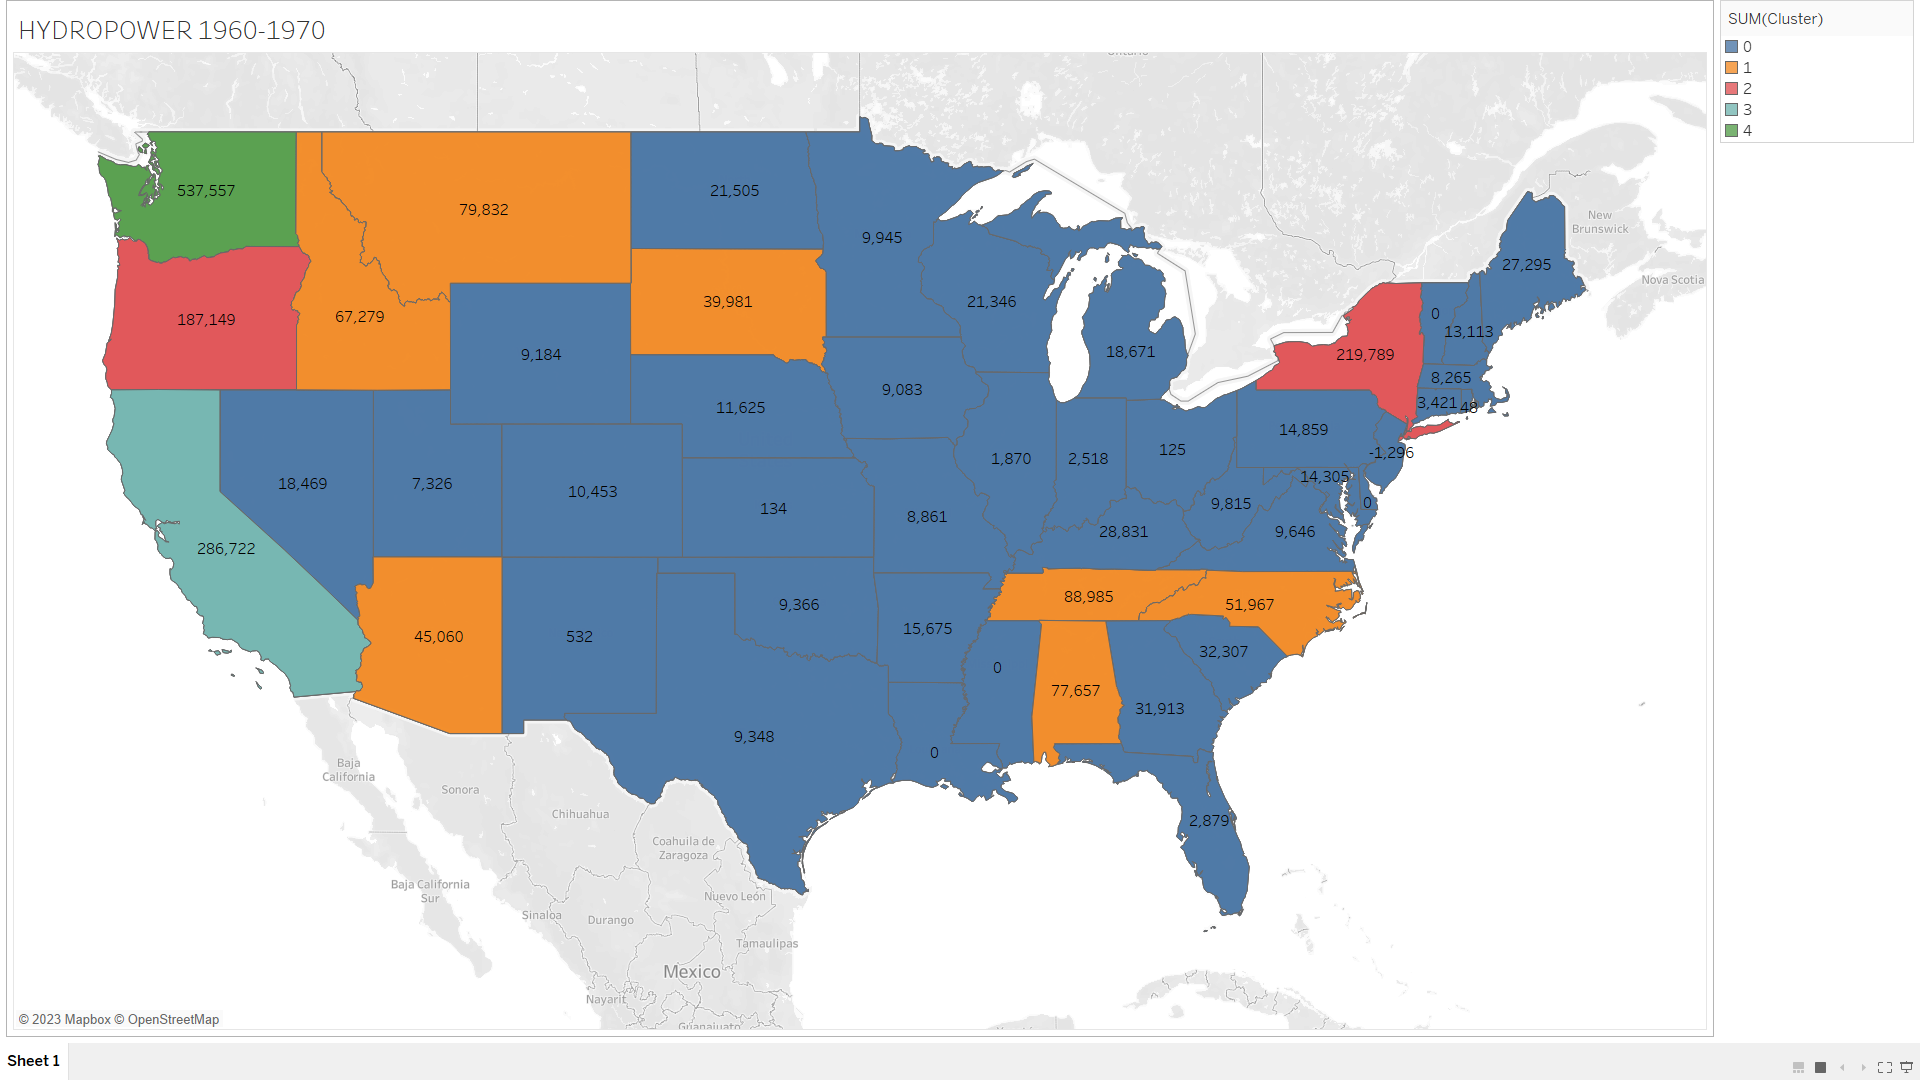

### Average for 1970 to 1980 and dividing it into 5 clusters

In [29]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980')  
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Hydropower_1970-1980.csv', index=True)



States in Cluster 0:
State: NJ - Value: -2667.9
State: MS - Value: 0.0
State: LA - Value: 0.0
State: DE - Value: 0.0
State: DC - Value: 5.1
State: RI - Value: 36.7
State: KS - Value: 53.3
State: OH - Value: 75.3
State: NM - Value: 566.8
State: HI - Value: 930.3
State: IL - Value: 1371.0
State: FL - Value: 2492.7
State: AK - Value: 4205.0
State: CT - Value: 4356.3
State: IN - Value: 4484.0
State: MA - Value: 4882.6
State: IA - Value: 9132.7
State: MN - Value: 9313.0
State: VT - Value: 9710.1
State: UT - Value: 9960.1
State: MO - Value: 10591.0
State: WV - Value: 11459.3
State: WY - Value: 11623.5
State: VA - Value: 12026.4
State: PA - Value: 12468.6
State: TX - Value: 12640.6
State: MI - Value: 12990.5
State: NE - Value: 13391.4
State: NH - Value: 13500.1
State: CO - Value: 14626.4
Cluster 0 Range: -2667.90 - 14626.40

States in Cluster 1:
State: NV - Value: 17811.4
State: MD - Value: 20593.5
State: WI - Value: 22249.7
State: OK - Value: 22692.7
State: AR - Value: 27773.8
State: ME - V

### Mapping Using Tablaue

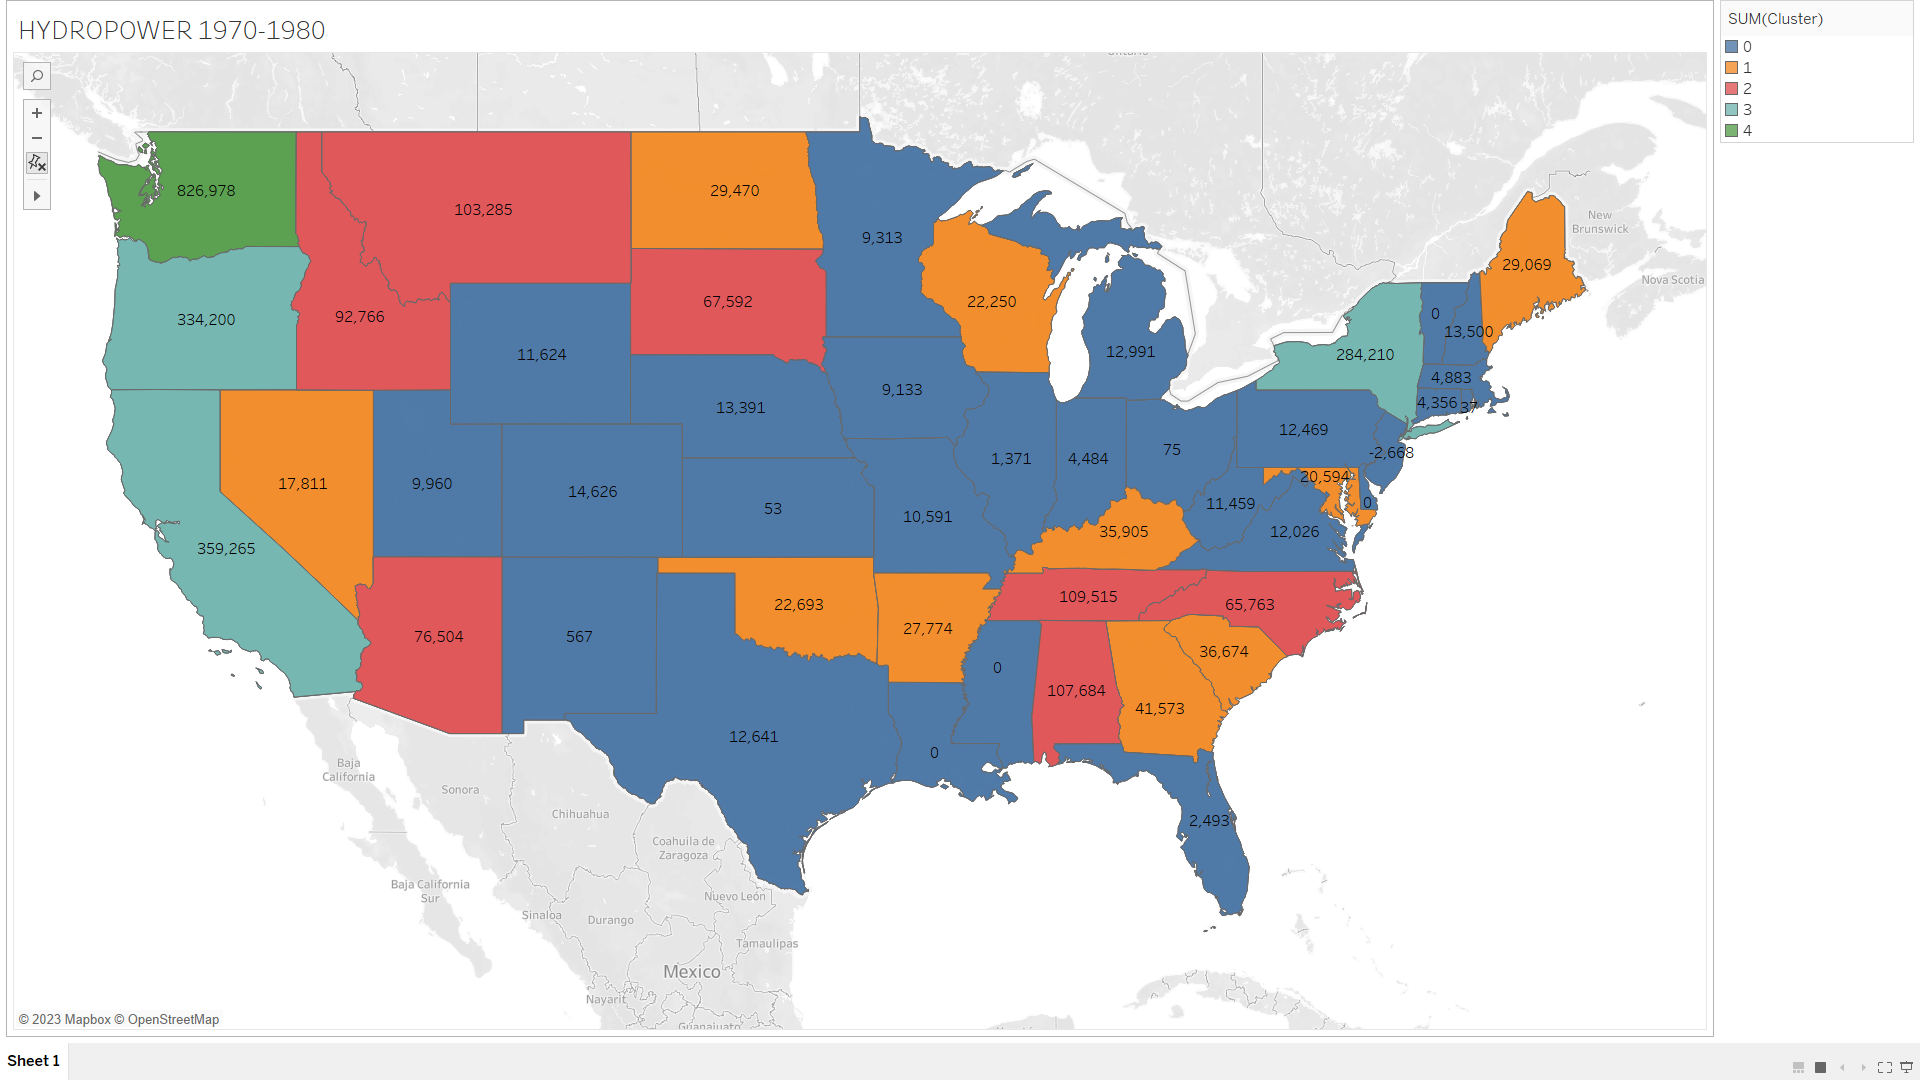

### Average for 1980 to 1990 and dividing it into 5 clusters

In [30]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990') 
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Hydropower_1980-1990.csv', index=True)



States in Cluster 0:
State: NJ - Value: -2293.0
State: MS - Value: 0.0
State: DC - Value: 0.0
State: DE - Value: 0.0
State: RI - Value: 24.3
State: KS - Value: 91.8
State: LA - Value: 682.9
State: HI - Value: 832.9
State: IL - Value: 1279.9
State: NM - Value: 1403.4
State: OH - Value: 1438.9
State: FL - Value: 2258.5
State: CT - Value: 3870.3
State: MA - Value: 4260.6
State: IN - Value: 4759.2
State: VA - Value: 7308.3
State: AK - Value: 7976.0
State: IA - Value: 9285.3
State: WY - Value: 9620.1
State: MN - Value: 9665.1
State: UT - Value: 9799.6
State: MI - Value: 10362.9
State: VT - Value: 10493.0
State: WV - Value: 11644.0
State: NH - Value: 13570.2
State: NE - Value: 14016.6
State: PA - Value: 14268.8
State: TX - Value: 14928.8
State: MO - Value: 17593.1
State: MD - Value: 17708.4
State: CO - Value: 19249.3
State: WI - Value: 21899.2
State: SC - Value: 22231.7
State: ND - Value: 22451.8
State: OK - Value: 26187.5
State: AR - Value: 29797.2
State: NV - Value: 31320.5
State: ME - Va

### Mapping using Tablaue

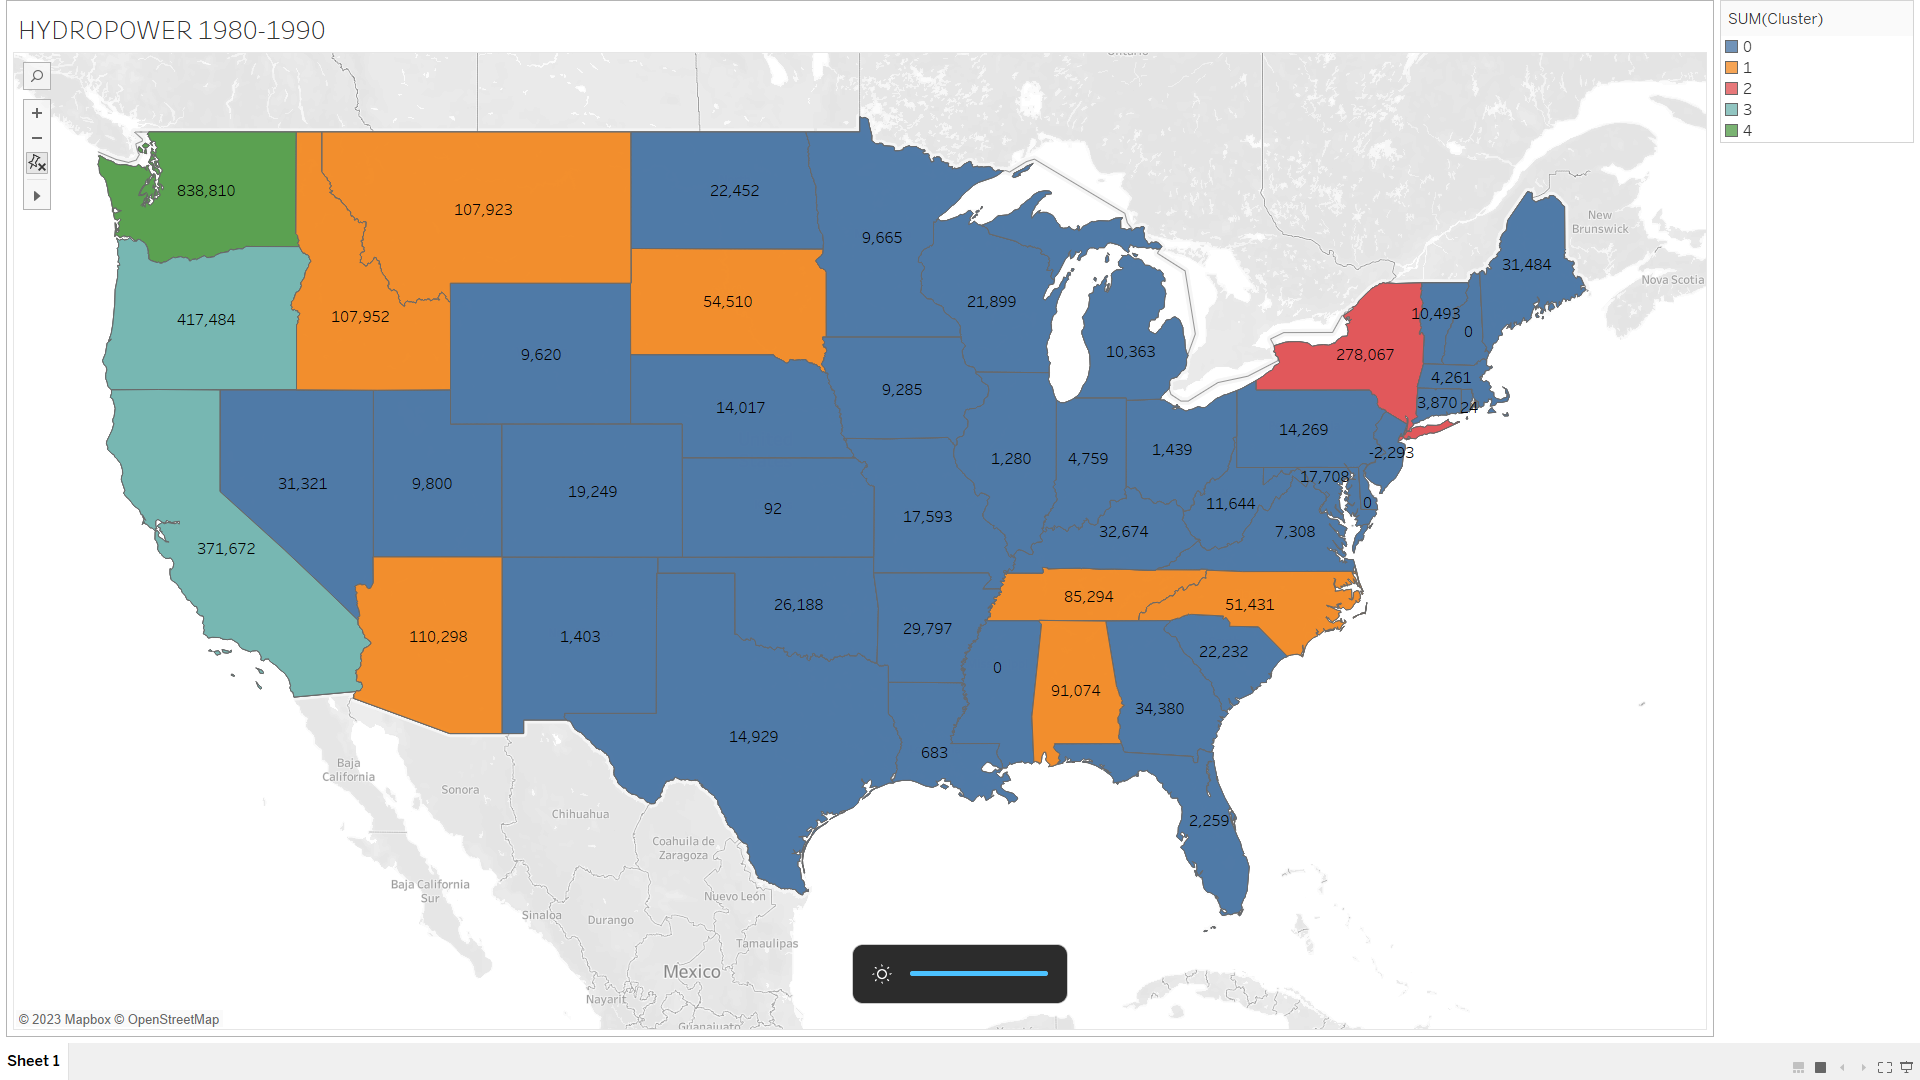

### Average for 1990 to 2000 and dividing it into 5 clusters

In [31]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places 
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000') 
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Hydropower_1990-2000.csv', index=True)



States in Cluster 0:
State: MS - Value: 0.0
State: DC - Value: 0.0
State: DE - Value: 0.0
State: RI - Value: 87.9
State: KS - Value: 113.4
State: NJ - Value: 183.7
State: HI - Value: 1012.1
State: IL - Value: 1311.6
State: FL - Value: 2160.1
State: NM - Value: 2503.8
State: OH - Value: 3426.4
State: CT - Value: 4718.4
State: IN - Value: 4903.5
State: LA - Value: 9120.0
State: IA - Value: 9493.1
State: UT - Value: 9779.7
State: WY - Value: 10266.9
State: MA - Value: 10397.8
State: VA - Value: 11067.8
State: MN - Value: 11087.9
State: VT - Value: 11187.1
State: AK - Value: 11454.5
State: WV - Value: 11856.0
State: NE - Value: 14428.1
State: NH - Value: 15637.9
State: TX - Value: 16492.3
State: MI - Value: 16812.6
State: CO - Value: 17713.9
State: MD - Value: 17786.2
State: MO - Value: 17823.5
State: ND - Value: 23321.1
State: WI - Value: 23585.5
State: NV - Value: 23971.0
State: PA - Value: 24216.7
State: SC - Value: 29503.1
State: OK - Value: 29673.7
State: AR - Value: 33567.3
State: K

### Mapping using Tablaue

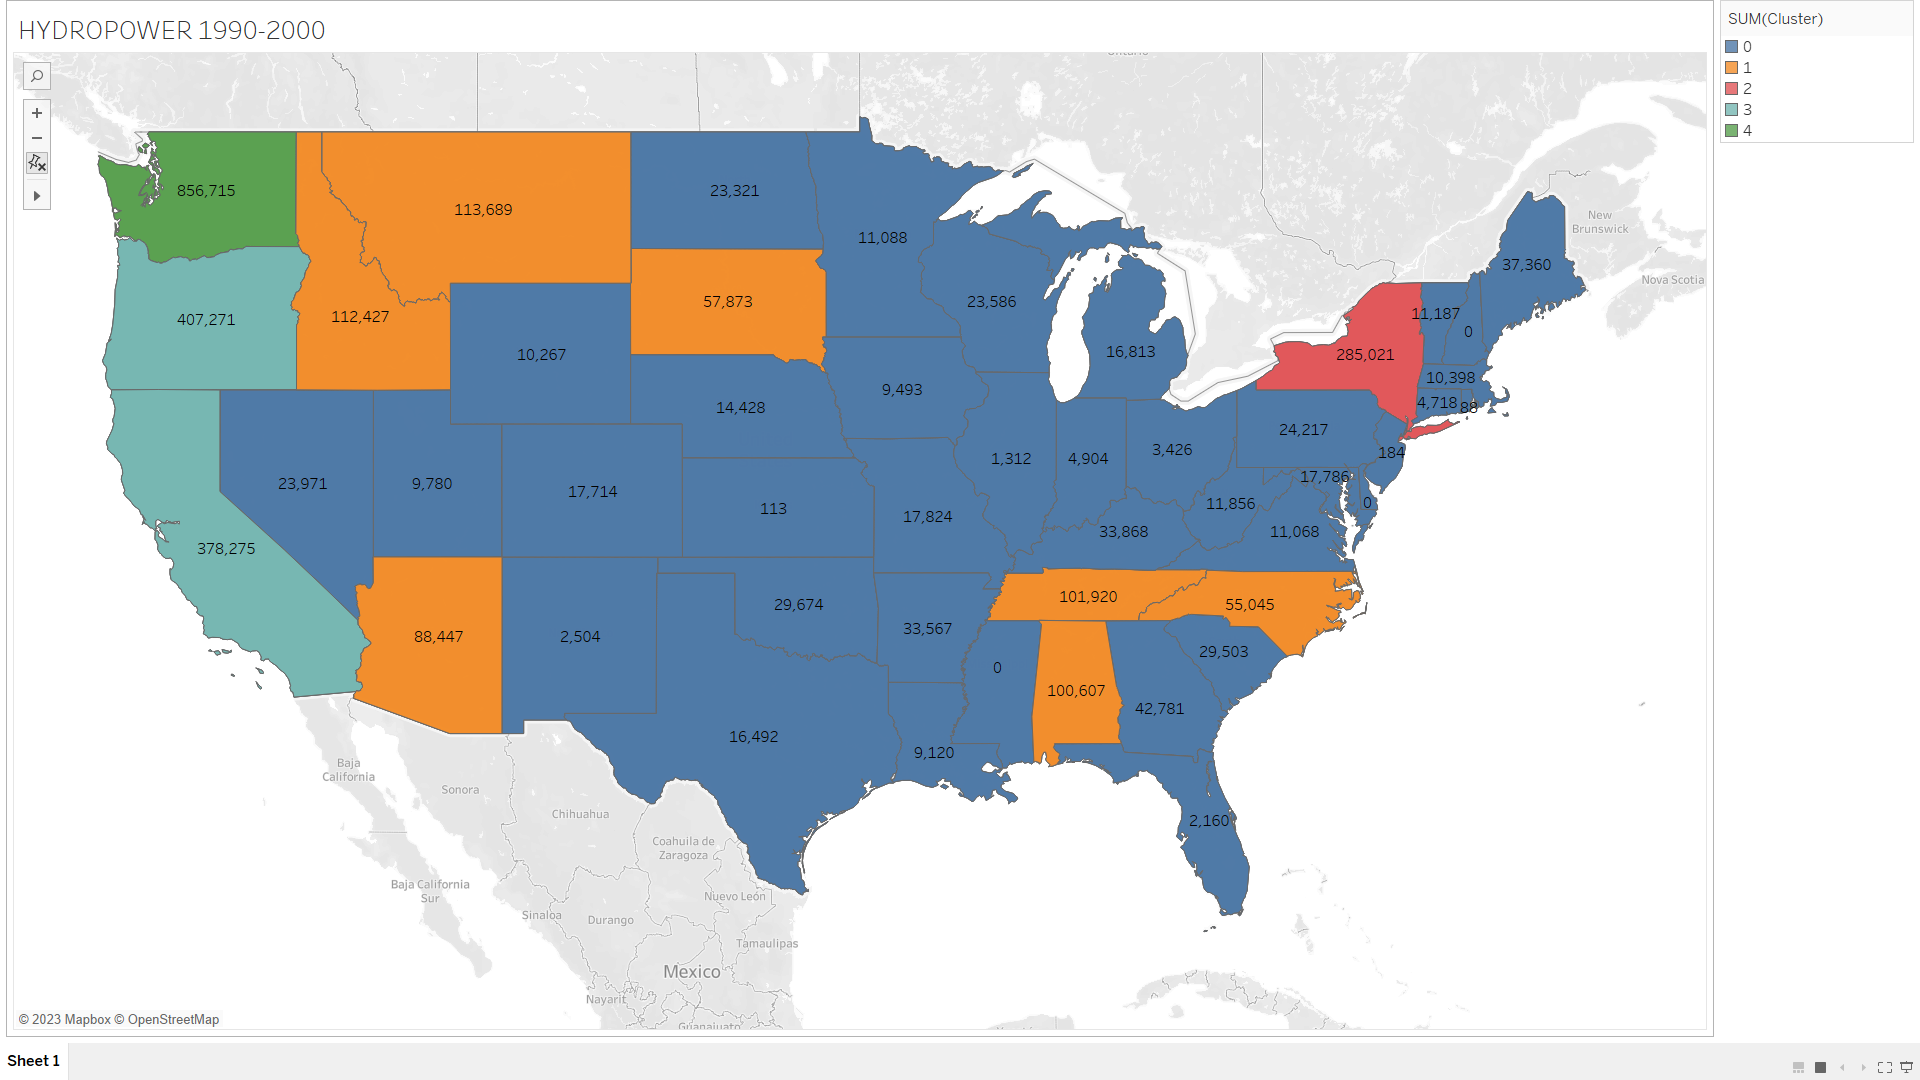

### Average for 2000 to 2010 and dividing it into 5 clusters

In [32]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  # Sort states within the cluster
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Hydropower_2000-2010.csv', index=True)



States in Cluster 0:
State: MS - Value: 0.0
State: DC - Value: 0.0
State: DE - Value: 0.0
State: RI - Value: 48.5
State: KS - Value: 131.7
State: NJ - Value: 269.1
State: HI - Value: 954.8
State: IL - Value: 1412.0
State: FL - Value: 2071.6
State: NM - Value: 2236.8
State: CT - Value: 4474.9
State: IN - Value: 4614.6
State: OH - Value: 5135.5
State: UT - Value: 6077.8
State: MN - Value: 7560.7
State: WY - Value: 7828.4
State: NE - Value: 8332.4
State: IA - Value: 9074.7
State: LA - Value: 9339.8
State: MA - Value: 10318.2
State: TX - Value: 11467.3
State: VT - Value: 11997.1
State: MO - Value: 12503.2
State: WV - Value: 13178.3
State: VA - Value: 13281.7
State: AK - Value: 13756.1
State: NH - Value: 14107.0
State: MI - Value: 14385.5
State: ND - Value: 15097.7
State: CO - Value: 15540.3
Cluster 0 Range: 0.00 - 15540.30

States in Cluster 1:
State: WI - Value: 18450.1
State: MD - Value: 18943.4
State: NV - Value: 20255.1
State: SC - Value: 20811.4
State: PA - Value: 25170.7
State: OK -

### Mapping using Tablaue

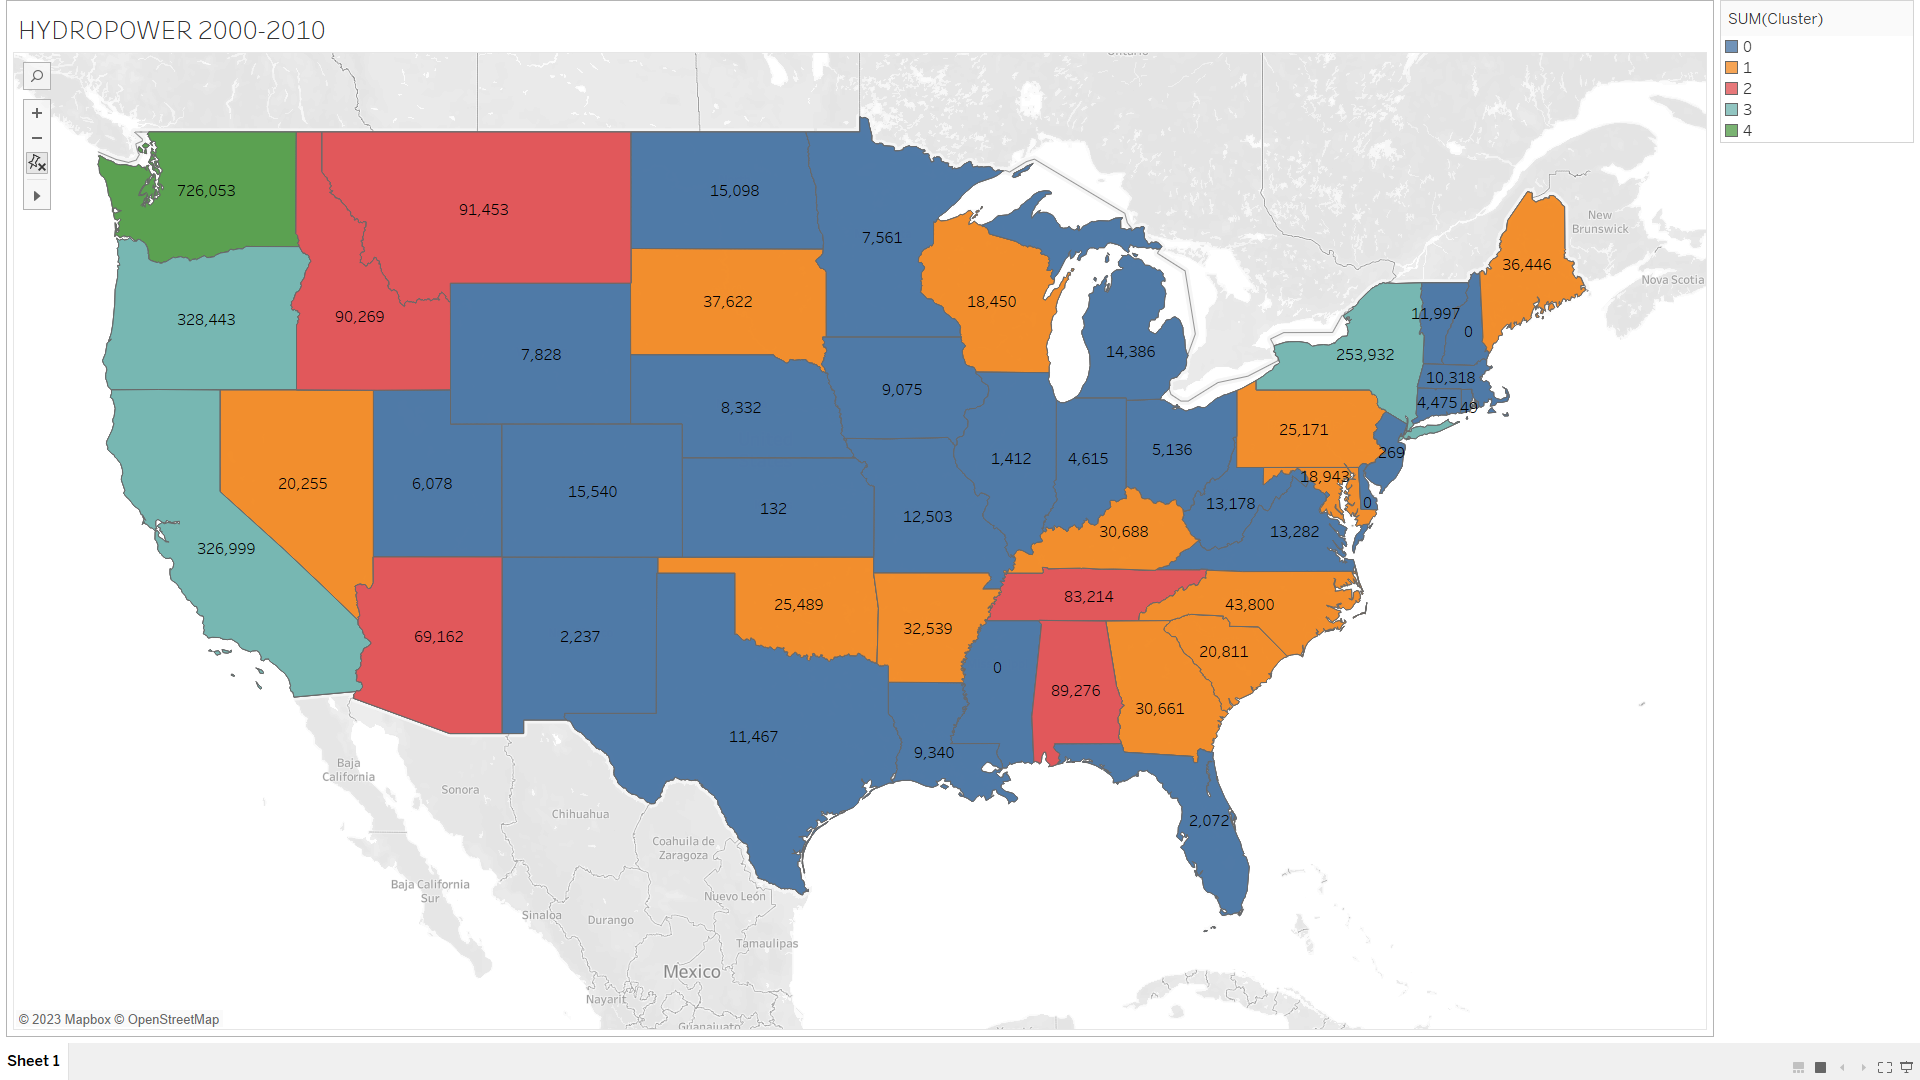

### Average for 2010 to 2020 and dividing it into 5 clusters

In [33]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Hydropower_2010-2020.csv', index=True)



States in Cluster 0:
State: MS - Value: 0.0
State: DC - Value: 0.0
State: DE - Value: 0.0
State: RI - Value: 36.4
State: NJ - Value: 167.3
State: KS - Value: 196.9
State: HI - Value: 879.7
State: IL - Value: 1198.4
State: NM - Value: 1444.0
State: FL - Value: 1954.7
State: IN - Value: 3229.9
State: CT - Value: 3610.7
State: OH - Value: 3796.2
State: UT - Value: 7936.9
State: MN - Value: 8108.9
State: TX - Value: 8319.5
State: IA - Value: 8319.6
State: MA - Value: 8810.7
State: WY - Value: 9008.1
State: LA - Value: 9821.4
State: VT - Value: 11393.0
State: MO - Value: 11696.1
State: NE - Value: 12340.3
State: VA - Value: 12476.1
State: NH - Value: 12573.6
State: MI - Value: 14126.5
State: WV - Value: 14537.8
State: AK - Value: 14649.3
State: CO - Value: 16035.1
State: MD - Value: 17851.6
Cluster 0 Range: 0.00 - 17851.60

States in Cluster 1:
State: NV - Value: 20103.2
State: OK - Value: 20548.8
State: WI - Value: 21957.4
State: ND - Value: 23002.0
State: SC - Value: 23228.9
State: PA - 

### Mapping using Tablaue

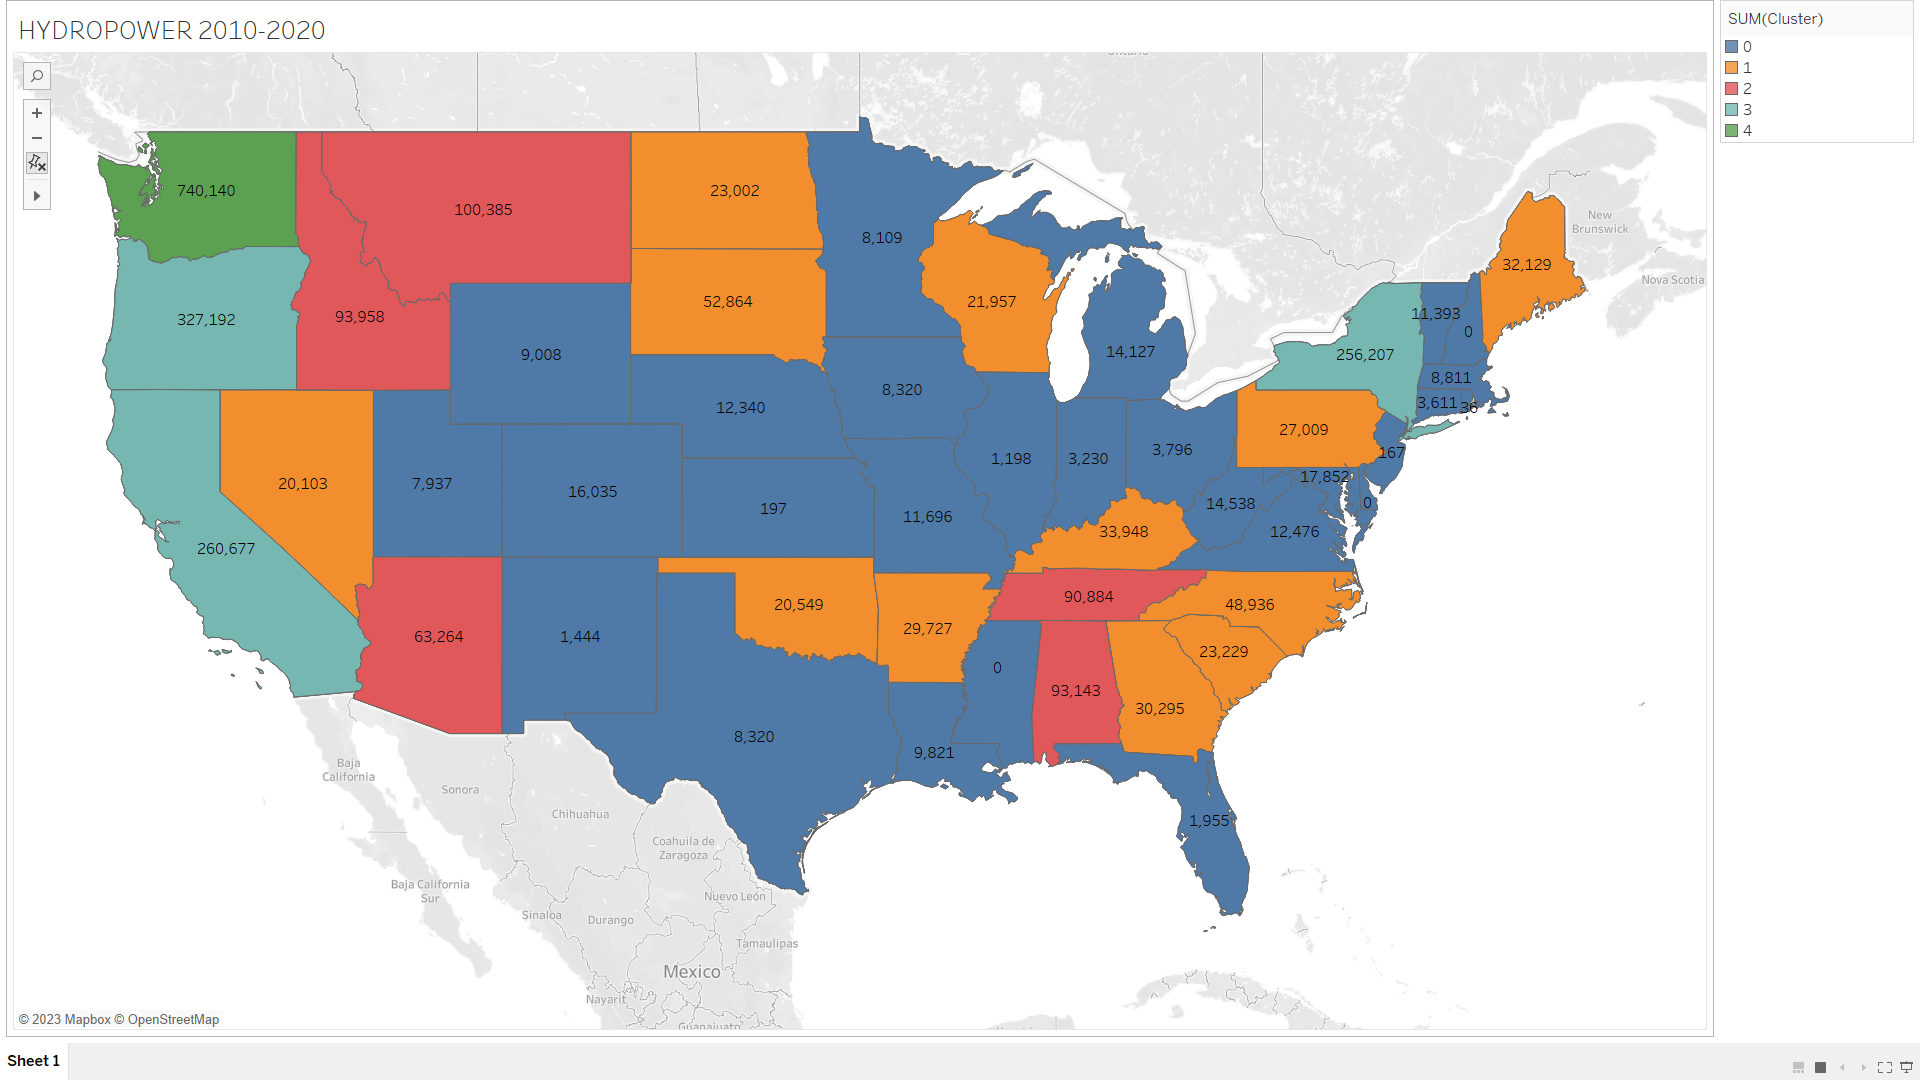

## Progression of the top 4 states 

### Progress of the states from 1960 to 1970

In [34]:
# Load the CSV file into a DataFrame
file_path = 'Hydropower_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OR','NY','CA','WA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1960-1970 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)


Information for states in the 1960-1970 interval:
    1960-1970  Cluster State Full Name
OR  187148.73        2          Oregon
NY  219789.27        2        New York
CA  286721.73        3      California
WA  537557.45        4      Washington


### Progress of the states from 1970 to 1980

In [35]:
# Load the CSV file and read it
file_path = 'Hydropower_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OR','NY','CA','WA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)


Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
NY   284209.7        3        New York
OR   334200.2        3          Oregon
CA   359264.6        3      California
WA   826977.6        4      Washington


### Progress of the states from 1980 to 1990

In [36]:
# Load the CSV file and read it
file_path = 'Hydropower_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OR','NY','CA','WA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1980-1990 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
NY   278067.0        2        New York
CA   371672.1        3      California
OR   417484.3        3          Oregon
WA   838809.5        4      Washington


### Progress of the states from 1990 to 2000

In [37]:
# Load the CSV file and read it
file_path = 'Hydropower_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OR','NY','CA','WA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1990-2000 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
NY   285020.9        2        New York
CA   378274.6        3      California
OR   407270.9        3          Oregon
WA   856714.7        4      Washington


### Progress of the states from 2000 to 2010

In [38]:
# Load the CSV file and read it
file_path = 'Hydropower_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OR','NY','CA','WA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
NY   253932.1        3        New York
CA   326998.8        3      California
OR   328442.6        3          Oregon
WA   726052.6        4      Washington


### Progress of the states from 2010 to 2020

In [39]:
# Load the CSV file and read it
file_path = 'Hydropower_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information 
state_abbreviations = ['OR','NY','CA','WA']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2010-2020 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)


Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
NY   256207.4        3        New York
CA   260677.3        3      California
OR   327192.2        3          Oregon
WA   740140.2        4      Washington


### Plot the selected states

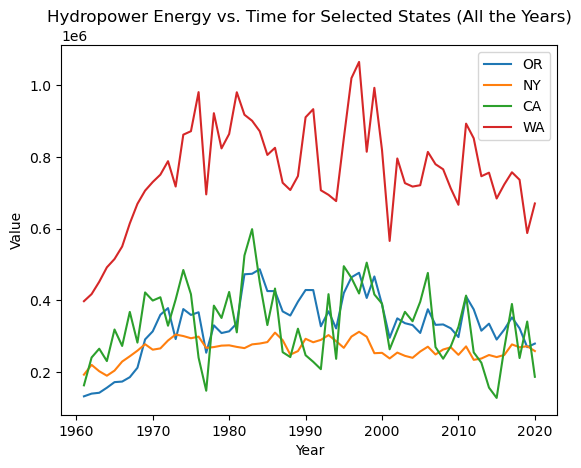

In [13]:
# Select only the 60 columns
Hydropower_60 = Hydropower.iloc[:, 1:61]

# Transpose the data to have years as rows and states as columns
Hydropower_T_60 = Hydropower_60.transpose()

# list of state abbreviations to plot
state_abbreviations =   ['OR','NY','CA','WA']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Hydropower_T_60.index, Hydropower_T_60[state], label=state)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Hydropower Energy vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

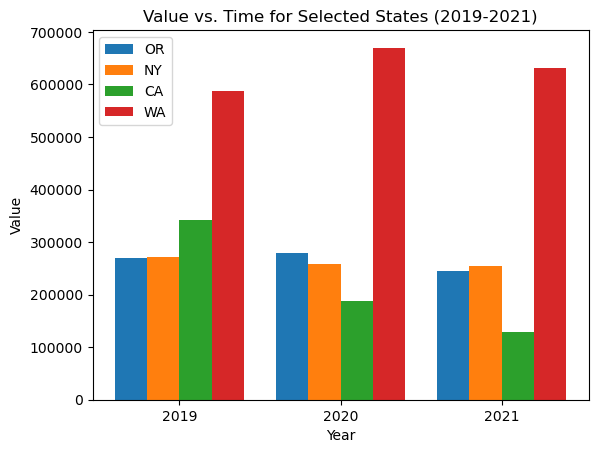

In [8]:
# Transpose the data to have years as rows and states as columns
Hydropower_T = Hydropower.transpose()

# Use iloc to get the required years (2019 to 2021)
selected_years = Hydropower_T.loc['2019':'2021']

# list of state abbreviations to plot
state_abbreviations = ['OR','NY','CA','WA']

# Set the width of the bars
bar_width = 0.2  

# Plot data for the selected states with the correct legend label
for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions = np.arange(len(selected_years.index)) + i * bar_width
    
    plt.bar(x_positions, selected_years[state], label=state, width=bar_width)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value vs. Time for Selected States (2019-2021)')
plt.xticks(np.arange(len(selected_years.index)) + (len(state_abbreviations) - 1) * bar_width / 2, selected_years.index)
plt.legend()

# Show the plot
plt.show()

## Deep Learning Forecasting

### LSTM

In [6]:
# sequence length and accuracy threshold
sequence_length_lstm = 55
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  

for state in ['OR', 'NY', 'CA', 'WA']:
    # Extract the data for the selected state
    data = Hydropower.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts
    forecasts_lstm = []
    # Lists to store actual values
    actual_values_lstm = []
    # Lists to store predictions
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)
            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the MSE
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the RMSE
    rmse_lstm = np.sqrt(mse_lstm)
    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}
for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Hydropower.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 341ms/step
Epoch 1/20
8/8 [==============================] - 2s 11ms/step - loss: 0.1315
Epoch 2/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0647
Epoch 3/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0296
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0184
Epoch 5/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0167
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0171
Epoch 7/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 8/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0166
Epoch 9/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0156
Epoch 10/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0165
Epoch 11/20
8/8 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 12/20
8/8 [==============================] - 0s 12ms/step - loss: 0.0170
Epoch 13

17/17 [==============================] - 0s 11ms/step - loss: 0.0109
Epoch 19/20
17/17 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 2/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0128
Epoch 3/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 4/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0115
Epoch 5/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 6/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 8/20
18/18 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 9/20
18/18 [==============================] - 0s 12ms/step - loss: 0.0108
Epoch 10/20
18/18 [==============================] - 0s 12ms/step 

27/27 [==============================] - 0s 12ms/step - loss: 0.0089
Epoch 15/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0075
Epoch 16/20
27/27 [==============================] - 0s 13ms/step - loss: 0.0073
Epoch 17/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 18/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 19/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 2/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 3/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 4/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0072
Epoch 5/20
28/28 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 6/20
28/28 [==============================] - 0s 11ms/st

37/37 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 11/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0027
Epoch 12/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 13/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 14/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 15/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0036
Epoch 16/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0031
Epoch 17/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0030
Epoch 18/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 19/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
38/38 [==============================] - 0s 11ms/step - loss: 0.0026
Epoch 2/20
38/38 [==============================] - 0s 11m

47/47 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 5/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 6/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 7/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 8/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 9/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0025
Epoch 10/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0036
Epoch 11/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 12/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 13/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 14/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 15/20
47/47 [==============================] - 1s 11ms/step - loss: 9.7675e-04
Epoch 16/20
47/47 [======================

1/1 [==============================] - 0s 23ms/step
Epoch 1/20
52/52 [==============================] - 1s 11ms/step - loss: 9.9952e-04
Epoch 2/20
52/52 [==============================] - 1s 11ms/step - loss: 5.0308e-04
Epoch 3/20
52/52 [==============================] - 1s 10ms/step - loss: 8.0525e-04
Epoch 4/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 5/20
52/52 [==============================] - 1s 10ms/step - loss: 7.8989e-04
Epoch 6/20
52/52 [==============================] - 1s 11ms/step - loss: 6.5549e-04
Epoch 7/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 8/20
52/52 [==============================] - 1s 11ms/step - loss: 7.8765e-04
Epoch 9/20
52/52 [==============================] - 1s 10ms/step - loss: 6.1858e-04
Epoch 10/20
52/52 [==============================] - 1s 11ms/step - loss: 6.4748e-04
Epoch 11/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 12/20
52/52 [===============

61/61 [==============================] - 1s 12ms/step - loss: 9.7954e-04
Epoch 9/20
61/61 [==============================] - 1s 14ms/step - loss: 9.1999e-04
Epoch 10/20
61/61 [==============================] - 1s 11ms/step - loss: 8.3605e-04
Epoch 11/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 12/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 13/20
61/61 [==============================] - 1s 11ms/step - loss: 6.8654e-04
Epoch 14/20
61/61 [==============================] - 1s 12ms/step - loss: 6.8378e-04
Epoch 15/20
61/61 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 16/20
61/61 [==============================] - 1s 12ms/step - loss: 6.7941e-04
Epoch 17/20
61/61 [==============================] - 1s 12ms/step - loss: 7.9539e-04
Epoch 18/20
61/61 [==============================] - 1s 11ms/step - loss: 6.5374e-04
Epoch 19/20
61/61 [==============================] - 1s 11ms/step - loss: 7.2913e-04
Epoch

1/1 [==============================] - 0s 35ms/step
Epoch 1/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0058
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0065
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.0046
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 8/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0048
Epoch 9/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0046
Epoch 10/20
16/16 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 11/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0046
Epoch 12/20
16/16 [==============================] - 0s 12ms/step 

25/25 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 18/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 19/20
25/25 [==============================] - 0s 12ms/step - loss: 0.0025
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 2/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 3/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 4/20
26/26 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 5/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 6/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 7/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 8/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 9/20
26/26 [==============================] - 0s 11ms/step 

35/35 [==============================] - 0s 12ms/step - loss: 0.0082
Epoch 14/20
35/35 [==============================] - 0s 12ms/step - loss: 0.0079
Epoch 15/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0079
Epoch 16/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0079
Epoch 17/20
35/35 [==============================] - 0s 12ms/step - loss: 0.0080
Epoch 18/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 19/20
35/35 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 2/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 3/20
36/36 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 4/20
36/36 [==============================] - 0s 13ms/step - loss: 0.0076
Epoch 5/20
36/36 [==============================] - 0s 10ms/s

45/45 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 10/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 11/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 12/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0101
Epoch 13/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 14/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 15/20
45/45 [==============================] - 0s 10ms/step - loss: 0.0099
Epoch 16/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0101
Epoch 17/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0098
Epoch 18/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0101
Epoch 19/20
45/45 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
46/46 [==============================] - 1s 11

55/55 [==============================] - 1s 11ms/step - loss: 0.0088
Epoch 6/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0089
Epoch 7/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0095
Epoch 8/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0086
Epoch 9/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0080
Epoch 10/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0088
Epoch 11/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0088
Epoch 12/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0102
Epoch 13/20
55/55 [==============================] - 1s 10ms/step - loss: 0.0104
Epoch 14/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0088
Epoch 15/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0090
Epoch 16/20
55/55 [==============================] - 1s 11ms/step - loss: 0.0091
Epoch 17/20
55/55 [=========================

Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0532
Epoch 2/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0495
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0517
Epoch 4/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0483
Epoch 5/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0501
Epoch 6/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0508
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0491
Epoch 8/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0484
Epoch 9/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0511
Epoch 10/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0484
Epoch 11/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0479
Epoch 12/20
10/10 [==============================] - 0

19/19 [==============================] - 0s 11ms/step - loss: 0.0343
Epoch 17/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0380
Epoch 18/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0337
Epoch 19/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0340
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0337
Epoch 2/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0346
Epoch 3/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0333
Epoch 4/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0371
Epoch 5/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0348
Epoch 6/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0309
Epoch 7/20
20/20 [==============================] - 0s 11ms/step - loss: 0.0313
Epoch 8/20
20/20 [==============================] - 0s 11ms/step

29/29 [==============================] - 0s 11ms/step - loss: 0.0418
Epoch 13/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0426
Epoch 14/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0470
Epoch 15/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0442
Epoch 16/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0471
Epoch 17/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0532
Epoch 18/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0443
Epoch 19/20
29/29 [==============================] - 0s 11ms/step - loss: 0.0464
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0409
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0410
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0431
Epoch 4/20
30/30 [==============================] - 0s 11ms/

39/39 [==============================] - 0s 11ms/step - loss: 0.0249
Epoch 9/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0267
Epoch 10/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0257
Epoch 11/20
39/39 [==============================] - 0s 12ms/step - loss: 0.0290
Epoch 12/20
39/39 [==============================] - 0s 12ms/step - loss: 0.0268
Epoch 13/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 14/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0263
Epoch 15/20
39/39 [==============================] - 0s 12ms/step - loss: 0.0368
Epoch 16/20
39/39 [==============================] - 1s 13ms/step - loss: 0.0288
Epoch 17/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0258
Epoch 18/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0247
Epoch 19/20
39/39 [==============================] - 0s 11ms/step - loss: 0.0219
Epoch 20/20
1/1 [========================

49/49 [==============================] - 1s 11ms/step - loss: 0.0140
Epoch 5/20
49/49 [==============================] - 1s 12ms/step - loss: 0.0150
Epoch 6/20
49/49 [==============================] - 1s 10ms/step - loss: 0.0160
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0125
Epoch 8/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0155
Epoch 9/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0128
Epoch 10/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0135
Epoch 11/20
49/49 [==============================] - 1s 12ms/step - loss: 0.0120
Epoch 12/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0137
Epoch 13/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0160
Epoch 14/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0128
Epoch 15/20
49/49 [==============================] - 1s 12ms/step - loss: 0.0129
Epoch 16/20
49/49 [==========================

1/1 [==============================] - 0s 36ms/step
Epoch 1/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0050
Epoch 2/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0138
Epoch 3/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0121
Epoch 4/20
59/59 [==============================] - 1s 11ms/step - loss: 0.0071
Epoch 5/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0078
Epoch 6/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0068
Epoch 7/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0062
Epoch 8/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0060
Epoch 9/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0059
Epoch 10/20
59/59 [==============================] - 1s 13ms/step - loss: 0.0156
Epoch 11/20
59/59 [==============================] - 1s 12ms/step - loss: 0.0117
Epoch 12/20
59/59 [==============================] - 1s 12ms/step 

13/13 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 16/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 17/20
13/13 [==============================] - 0s 12ms/step - loss: 0.0039
Epoch 18/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0042
Epoch 19/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
14/14 [==============================] - 0s 11ms/step - loss: 0.0038
Epoch 2/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 3/20
14/14 [==============================] - 0s 11ms/step - loss: 0.0044
Epoch 4/20
14/14 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 5/20
14/14 [==============================] - 0s 10ms/step - loss: 0.0038
Epoch 6/20
14/14 [==============================] - 0s 11ms/step - loss: 0.0041
Epoch 7/20
14/14 [==============================] - 0s 10ms/ste

23/23 [==============================] - 0s 11ms/step - loss: 0.0111
Epoch 12/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0109
Epoch 13/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 14/20
23/23 [==============================] - 0s 12ms/step - loss: 0.0089
Epoch 15/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 16/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0092
Epoch 17/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 18/20
23/23 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 19/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
24/24 [==============================] - 0s 11ms/step - loss: 0.0087
Epoch 2/20
24/24 [==============================] - 0s 12ms/step - loss: 0.0088
Epoch 3/20
24/24 [==============================] - 0s 11ms

33/33 [==============================] - 0s 12ms/step - loss: 0.0069
Epoch 8/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 9/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 10/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 11/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0069
Epoch 12/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0067
Epoch 13/20
33/33 [==============================] - 0s 12ms/step - loss: 0.0062
Epoch 14/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 15/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0062
Epoch 16/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0065
Epoch 17/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0067
Epoch 18/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0060
Epoch 19/20
33/33 [=======================

43/43 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 4/20
43/43 [==============================] - 0s 11ms/step - loss: 0.0033
Epoch 5/20
43/43 [==============================] - 1s 12ms/step - loss: 0.0035
Epoch 6/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 7/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 8/20
43/43 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 9/20
43/43 [==============================] - 0s 11ms/step - loss: 0.0066
Epoch 10/20
43/43 [==============================] - 1s 12ms/step - loss: 0.0035
Epoch 11/20
43/43 [==============================] - 1s 12ms/step - loss: 0.0034
Epoch 12/20
43/43 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 13/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 14/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 15/20
43/43 [===========================

1/1 [==============================] - 0s 32ms/step
Epoch 1/20
53/53 [==============================] - 1s 13ms/step - loss: 0.0076
Epoch 2/20
53/53 [==============================] - 1s 13ms/step - loss: 0.0057
Epoch 3/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0044
Epoch 4/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0035
Epoch 5/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0067
Epoch 6/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0071
Epoch 7/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0038
Epoch 8/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0037
Epoch 9/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 10/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0032
Epoch 11/20
53/53 [==============================] - 1s 12ms/step - loss: 0.0027
Epoch 12/20
53/53 [==============================] - 1s 11ms/step 

62/62 [==============================] - 1s 11ms/step - loss: 0.0024
Epoch 17/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 18/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 19/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 20/20
1/1 [==============================] - 0s 34ms/step

Mean Squared Error (MSE) for All States:
MSE for OR (LSTM): 248387485.06
MSE for NY (LSTM): 92350811.52
MSE for CA (LSTM): 704480975.32
MSE for WA (LSTM): 1971529328.49

Root Mean Squared Error (RMSE) for All States:
RMSE for OR (LSTM): 15760.31
RMSE for NY (LSTM): 9609.93
RMSE for CA (LSTM): 26542.06
RMSE for WA (LSTM): 44401.91

Forecasts for All States:
Forecasts for OR - 2022: 230068.47, 2023: 218236.88
Forecasts for NY - 2022: 256409.17, 2023: 252422.41
Forecasts for CA - 2022: 242777.92, 2023: 265378.81
Forecasts for WA - 2022: 697536.81, 2023: 650401.38

Predictions for 2019, 2020, and 2021 for All States:
Pr

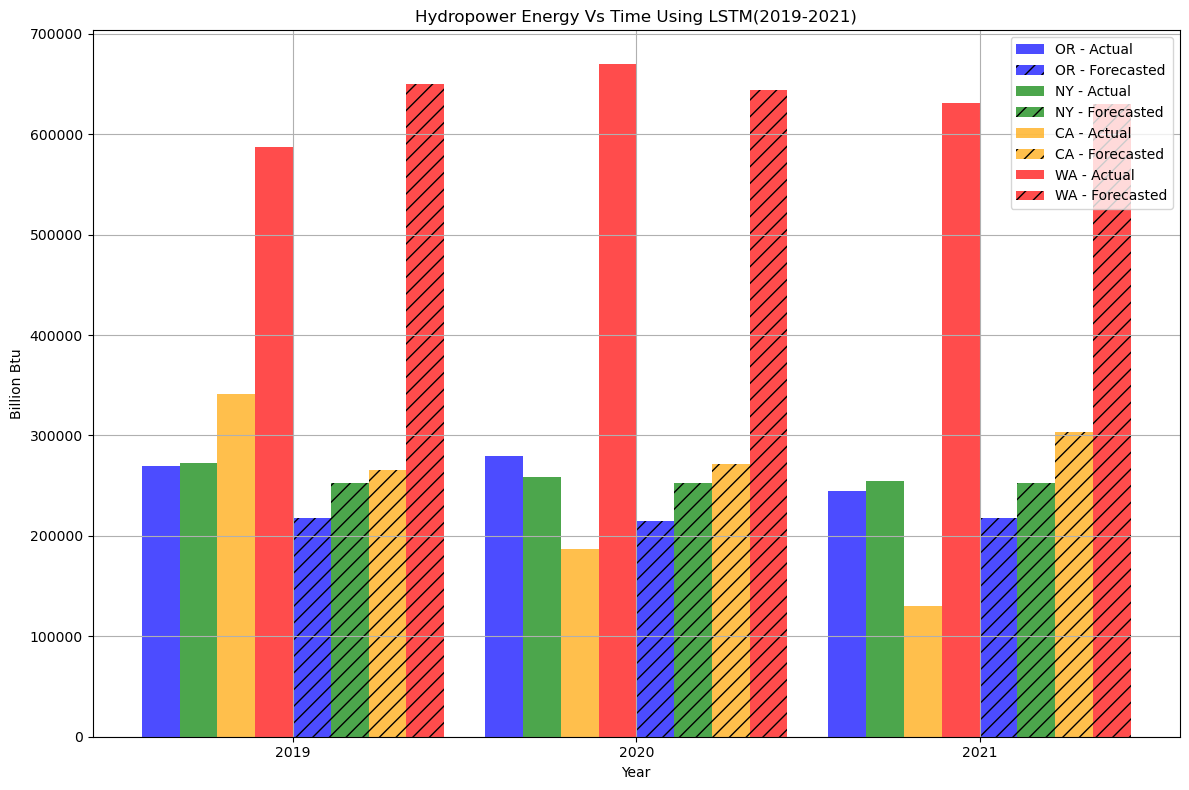

In [36]:
# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Hydropower_T.iloc[-3:]

# list of state abbreviations to plot
state_abbreviations = ['OR', 'NY', 'CA', 'WA']

# Set the width of the bars
bar_width = 0.11

# Define colors for each state
state_colors = {'OR': 'blue', 'NY': 'green', 'CA': 'orange', 'WA': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(selected_years)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Hydropower Energy Vs Time Using LSTM(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### GRU

In [6]:
# the sequence length and threshold accuracy
sequence_length_gru = 50
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {}  

for state in ['OR', 'NY', 'CA', 'WA']:
    # Extract the data for the selected state
    data = Hydropower.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecast
    forecasts_gru = []
    # Lists to store actual values
    actual_values_gru = []
    # Lists to store predictions
    predictions_gru = []
    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)
            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))
    # Calculate the MSE
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)
    # Calculate the RMSE
    rmse_gru = np.sqrt(mse_gru)
    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")
    
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Hydropower.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 170ms/step
Epoch 1/20
13/13 [==============================] - 1s 9ms/step - loss: 0.2964
Epoch 2/20
13/13 [==============================] - 0s 9ms/step - loss: 0.1770
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0808
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0300
Epoch 5/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0223
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0161
Epoch 7/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 8/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 9/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0168
Epoch 10/20
13/13 [==============================] - 0s 8ms/step - loss: 0.0181
Epoch 11/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 12/20
13/13 [==============================] - 0s 11ms/step - loss: 0

22/22 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0201
Epoch 2/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0204
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0199
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0205
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0211
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0231
Epoch 7/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 8/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 9/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0191
Epoch 10/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0218
Epoch 11/20
23/23 [==============================] - 0s 8ms/step - loss: 0.01

32/32 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 18/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0084
Epoch 19/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 20/20
1/1 [==============================] - 0s 19ms/step
Epoch 1/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 2/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 3/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 4/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 5/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 6/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 7/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 8/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 9/20
33/33 [==============================] - 0s 8ms/step - loss: 0.00

42/42 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 16/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 17/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 18/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 19/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 20/20
1/1 [==============================] - 0s 17ms/step
Epoch 1/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 2/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 3/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 4/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 5/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 6/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 7/20
43/43 [==============================] - 0s 8ms/step - loss: 0.

52/52 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 14/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 15/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 16/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 17/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 18/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 19/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 20/20
1/1 [==============================] - 0s 19ms/step
Epoch 1/20
53/53 [==============================] - 1s 11ms/step - loss: 0.0072
Epoch 2/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0054
Epoch 3/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 4/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 5/20
53/53 [==============================] - 0s 7ms/step - loss:

62/62 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 12/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 13/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 14/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 15/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 16/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 17/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 18/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 19/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0143
Epoch 20/20
1/1 [==============================] - 0s 158ms/step
Epoch 1/20
13/13 [==============================] - 1s 8ms/step - loss: 0.3109
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.1495
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - los

22/22 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 7/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0058
Epoch 8/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 9/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 10/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 11/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 12/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 13/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 14/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 15/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 16/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 17/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 18/20
22/22 [==============================] - 0s

32/32 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 5/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0063
Epoch 8/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 9/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 10/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 11/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 12/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 13/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0070
Epoch 14/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 15/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 16/20
32/32 [==============================] - 0s 7

42/42 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 3/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 4/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 5/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 6/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 7/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 8/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 9/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 10/20
42/42 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 11/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 12/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 13/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 14/20
42/42 [==============================] - 0s

1/1 [==============================] - 0s 50ms/step
Epoch 1/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0013
Epoch 2/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0011
Epoch 3/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0012
Epoch 4/20
52/52 [==============================] - 1s 11ms/step - loss: 8.6061e-04
Epoch 5/20
52/52 [==============================] - 1s 10ms/step - loss: 8.6075e-04
Epoch 6/20
52/52 [==============================] - 1s 10ms/step - loss: 9.6070e-04
Epoch 7/20
52/52 [==============================] - 1s 10ms/step - loss: 8.8425e-04
Epoch 8/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 9/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 10/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 11/20
52/52 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 12/20
52/52 [==============================] - 0

61/61 [==============================] - 0s 7ms/step - loss: 6.7653e-04
Epoch 17/20
61/61 [==============================] - 1s 10ms/step - loss: 8.7723e-04
Epoch 18/20
61/61 [==============================] - 0s 7ms/step - loss: 8.0328e-04
Epoch 19/20
61/61 [==============================] - 0s 7ms/step - loss: 9.6157e-04
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0161
Epoch 2/20
62/62 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 3/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 5/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 6/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 7/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0016
Epoch 8/20
62/62 [==============================] - 1s 9ms

21/21 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 11/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0166
Epoch 12/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 13/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0197
Epoch 14/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0236
Epoch 15/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0172
Epoch 16/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0182
Epoch 17/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 18/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0170
Epoch 19/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 2/20
22/22 [==============================] - 0s 7ms/step - los

31/31 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 9/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 10/20
31/31 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 11/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 12/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 13/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0089
Epoch 14/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 15/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0062
Epoch 16/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0067
Epoch 17/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 18/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 19/20
31/31 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 20/20
1/1 [==============================] - 0s

41/41 [==============================] - 0s 7ms/step - loss: 0.0082
Epoch 7/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 8/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0079
Epoch 9/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0086
Epoch 10/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 11/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 12/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0070
Epoch 13/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 14/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0075
Epoch 15/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 16/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 17/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 18/20
41/41 [==============================] - 0s

51/51 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 5/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 6/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0068
Epoch 7/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 8/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 9/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 10/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 11/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0036
Epoch 12/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 13/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 14/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 15/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 16/20
51/51 [==============================] - 0s 9

61/61 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 3/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 4/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0058
Epoch 5/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 6/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 7/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 8/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0028
Epoch 9/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 10/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 11/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 12/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 13/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0024
Epoch 14/20
61/61 [==============================] - 0s 7ms

20/20 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 19/20
20/20 [==============================] - 0s 7ms/step - loss: 0.0135
Epoch 20/20
1/1 [==============================] - 0s 16ms/step
Epoch 1/20
21/21 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0139
Epoch 3/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 4/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0142
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0136
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0138
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0147
Epoch 8/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 9/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0158
Epoch 10/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0

30/30 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 17/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 18/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0126
Epoch 19/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 20/20
1/1 [==============================] - 0s 23ms/step
Epoch 1/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0131
Epoch 2/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 3/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0140
Epoch 4/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0137
Epoch 6/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 7/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0132
Epoch 8/20
31/31 [==============================] - 0s 12ms/step - l

40/40 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 15/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0143
Epoch 16/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0140
Epoch 17/20
40/40 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 18/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0099
Epoch 19/20
40/40 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0086
Epoch 2/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 3/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 4/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 5/20
41/41 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 6/20
41/41 [==============================] - 0s 7ms/step - loss: 0

50/50 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 13/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0048
Epoch 14/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0048
Epoch 15/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 16/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 17/20
50/50 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 18/20
50/50 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 19/20
50/50 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0143
Epoch 2/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 3/20
51/51 [==============================] - 0s 7ms/step - loss: 0.0053
Epoch 4/20
51/51 [==============================] - 0s 8ms/step - loss:

60/60 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 11/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 12/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 13/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 14/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0056
Epoch 15/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0149
Epoch 16/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0116
Epoch 17/20
60/60 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 18/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 19/20
60/60 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
61/61 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 2/20
61/61 [==============================] - 0s 8ms/step - los

In [11]:
# sequence length and other parameters
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {} 

for state in ['OR', 'NY', 'CA', 'WA']:
    # Extract the data for the selected state
    data = Hydropower.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include training data
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_gru = []
    actual_values_gru = []
    predictions_gru = []

    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)

            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)

    # Calculate the root mean squared error (RMSE)
    rmse_gru = np.sqrt(mse_gru)

    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Hydropower.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 537ms/step
Epoch 1/20
23/23 [==============================] - 2s 8ms/step - loss: 0.1894
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0249
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0227
Epoch 4/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0224
Epoch 5/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0206
Epoch 6/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0213
Epoch 7/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0216
Epoch 8/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0214
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 10/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 11/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0206
Epoch 12/20
23/23 [==============================] - 0s 9ms/step - loss: 

1/1 [==============================] - 0s 28ms/step
Epoch 1/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 2/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 3/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 4/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 5/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0179
Epoch 6/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 7/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0179
Epoch 8/20
28/28 [==============================] - 0s 8ms/step - loss: 0.0228
Epoch 9/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0162
Epoch 10/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0176
Epoch 11/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0166
Epoch 12/20
28/28 [==============================] - 0s 9ms/step - loss: 0.0

37/37 [==============================] - 1s 20ms/step - loss: 0.0202
Epoch 18/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0201
Epoch 19/20
37/37 [==============================] - 1s 20ms/step - loss: 0.0205
Epoch 20/20
1/1 [==============================] - 0s 50ms/step
Epoch 1/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0237
Epoch 2/20
38/38 [==============================] - 1s 20ms/step - loss: 0.0235
Epoch 3/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0235
Epoch 4/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0241
Epoch 5/20
38/38 [==============================] - 1s 21ms/step - loss: 0.0235
Epoch 6/20
38/38 [==============================] - 1s 20ms/step - loss: 0.0235
Epoch 7/20
38/38 [==============================] - 1s 20ms/step - loss: 0.0238
Epoch 8/20
38/38 [==============================] - 1s 19ms/step - loss: 0.0237
Epoch 9/20
38/38 [==============================] - 1s 18ms/step 

47/47 [==============================] - 1s 21ms/step - loss: 0.0120
Epoch 14/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0122
Epoch 15/20
47/47 [==============================] - 1s 21ms/step - loss: 0.0131
Epoch 16/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0138
Epoch 17/20
47/47 [==============================] - 1s 21ms/step - loss: 0.0126
Epoch 18/20
47/47 [==============================] - 1s 20ms/step - loss: 0.0121
Epoch 19/20
47/47 [==============================] - 1s 22ms/step - loss: 0.0120
Epoch 20/20
1/1 [==============================] - 0s 49ms/step
Epoch 1/20
48/48 [==============================] - 1s 20ms/step - loss: 0.0118
Epoch 2/20
48/48 [==============================] - 1s 20ms/step - loss: 0.0124
Epoch 3/20
48/48 [==============================] - 1s 19ms/step - loss: 0.0116
Epoch 4/20
48/48 [==============================] - 1s 19ms/step - loss: 0.0118
Epoch 5/20
48/48 [==============================] - 1s 19ms/s

57/57 [==============================] - 1s 19ms/step - loss: 0.0091
Epoch 10/20
57/57 [==============================] - 1s 19ms/step - loss: 0.0082
Epoch 11/20
57/57 [==============================] - 1s 20ms/step - loss: 0.0085
Epoch 12/20
57/57 [==============================] - 1s 20ms/step - loss: 0.0082
Epoch 13/20
57/57 [==============================] - 1s 19ms/step - loss: 0.0087
Epoch 14/20
57/57 [==============================] - 1s 20ms/step - loss: 0.0094
Epoch 15/20
57/57 [==============================] - 1s 20ms/step - loss: 0.0098
Epoch 16/20
57/57 [==============================] - 1s 18ms/step - loss: 0.0109
Epoch 17/20
57/57 [==============================] - 1s 19ms/step - loss: 0.0096
Epoch 18/20
57/57 [==============================] - 1s 19ms/step - loss: 0.0083
Epoch 19/20
57/57 [==============================] - 1s 20ms/step - loss: 0.0084
Epoch 20/20
1/1 [==============================] - 0s 66ms/step
Epoch 1/20
58/58 [==============================] - 1s 20

27/27 [==============================] - 1s 21ms/step - loss: 0.0073
Epoch 3/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0072
Epoch 4/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0070
Epoch 5/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0071
Epoch 6/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0061
Epoch 7/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0068
Epoch 8/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0069
Epoch 9/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0067
Epoch 10/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0063
Epoch 11/20
27/27 [==============================] - 1s 20ms/step - loss: 0.0063
Epoch 12/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0063
Epoch 13/20
27/27 [==============================] - 1s 21ms/step - loss: 0.0058
Epoch 14/20
27/27 [============================

36/36 [==============================] - 1s 23ms/step - loss: 0.0076
Epoch 20/20
1/1 [==============================] - 0s 89ms/step
Epoch 1/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0067
Epoch 2/20
37/37 [==============================] - 1s 24ms/step - loss: 0.0067
Epoch 3/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0069
Epoch 4/20
37/37 [==============================] - 1s 22ms/step - loss: 0.0074
Epoch 5/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0068
Epoch 6/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0066
Epoch 7/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0065
Epoch 8/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0075
Epoch 9/20
37/37 [==============================] - 1s 23ms/step - loss: 0.0069
Epoch 10/20
37/37 [==============================] - 1s 25ms/step - loss: 0.0071
Epoch 11/20
37/37 [==============================] - 1s 22ms/step 

46/46 [==============================] - 1s 20ms/step - loss: 0.0052
Epoch 16/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0051
Epoch 17/20
46/46 [==============================] - 1s 26ms/step - loss: 0.0050
Epoch 18/20
46/46 [==============================] - 1s 23ms/step - loss: 0.0050
Epoch 19/20
46/46 [==============================] - 1s 23ms/step - loss: 0.0061
Epoch 20/20
1/1 [==============================] - 0s 81ms/step
Epoch 1/20
47/47 [==============================] - 1s 22ms/step - loss: 0.0050
Epoch 2/20
47/47 [==============================] - 1s 22ms/step - loss: 0.0051
Epoch 3/20
47/47 [==============================] - 1s 22ms/step - loss: 0.0051
Epoch 4/20
47/47 [==============================] - 1s 22ms/step - loss: 0.0052
Epoch 5/20
47/47 [==============================] - 1s 21ms/step - loss: 0.0056
Epoch 6/20
47/47 [==============================] - 1s 23ms/step - loss: 0.0058
Epoch 7/20
47/47 [==============================] - 1s 22ms/ste

56/56 [==============================] - 1s 20ms/step - loss: 0.0039
Epoch 12/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0037
Epoch 13/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0036
Epoch 14/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0033
Epoch 15/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0035
Epoch 16/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0042
Epoch 17/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0042
Epoch 18/20
56/56 [==============================] - 1s 21ms/step - loss: 0.0036
Epoch 19/20
56/56 [==============================] - 1s 20ms/step - loss: 0.0038
Epoch 20/20
1/1 [==============================] - 0s 87ms/step
Epoch 1/20
57/57 [==============================] - 1s 20ms/step - loss: 0.0033
Epoch 2/20
57/57 [==============================] - 1s 22ms/step - loss: 0.0033
Epoch 3/20
57/57 [==============================] - 1s 22ms

26/26 [==============================] - 0s 16ms/step - loss: 0.0583
Epoch 5/20
26/26 [==============================] - 0s 16ms/step - loss: 0.0599
Epoch 6/20
26/26 [==============================] - 0s 17ms/step - loss: 0.0574
Epoch 7/20
26/26 [==============================] - 0s 16ms/step - loss: 0.0582
Epoch 8/20
26/26 [==============================] - 0s 17ms/step - loss: 0.0573
Epoch 9/20
26/26 [==============================] - 0s 17ms/step - loss: 0.0569
Epoch 10/20
26/26 [==============================] - 0s 16ms/step - loss: 0.0589
Epoch 11/20
26/26 [==============================] - 0s 18ms/step - loss: 0.0658
Epoch 12/20
26/26 [==============================] - 0s 15ms/step - loss: 0.0580
Epoch 13/20
26/26 [==============================] - 0s 17ms/step - loss: 0.0582
Epoch 14/20
26/26 [==============================] - 0s 15ms/step - loss: 0.0601
Epoch 15/20
26/26 [==============================] - 0s 17ms/step - loss: 0.0593
Epoch 16/20
26/26 [==========================

1/1 [==============================] - 0s 87ms/step
Epoch 1/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0427
Epoch 2/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0371
Epoch 3/20
36/36 [==============================] - 1s 19ms/step - loss: 0.0337
Epoch 4/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0322
Epoch 5/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0365
Epoch 6/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0377
Epoch 7/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0324
Epoch 8/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0335
Epoch 9/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0311
Epoch 10/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0316
Epoch 11/20
36/36 [==============================] - 1s 20ms/step - loss: 0.0312
Epoch 12/20
36/36 [==============================] - 1s 21ms/step 

45/45 [==============================] - 1s 21ms/step - loss: 0.0223
Epoch 18/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0194
Epoch 19/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0189
Epoch 20/20
1/1 [==============================] - 0s 84ms/step
Epoch 1/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0218
Epoch 2/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0218
Epoch 3/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0216
Epoch 4/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0217
Epoch 5/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0199
Epoch 6/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0210
Epoch 7/20
46/46 [==============================] - 1s 21ms/step - loss: 0.0223
Epoch 8/20
46/46 [==============================] - 1s 20ms/step - loss: 0.0217
Epoch 9/20
46/46 [==============================] - 1s 21ms/step 

55/55 [==============================] - 1s 18ms/step - loss: 0.0171
Epoch 14/20
55/55 [==============================] - 1s 17ms/step - loss: 0.0165
Epoch 15/20
55/55 [==============================] - 1s 18ms/step - loss: 0.0169
Epoch 16/20
55/55 [==============================] - 1s 18ms/step - loss: 0.0167
Epoch 17/20
55/55 [==============================] - 1s 17ms/step - loss: 0.0163
Epoch 18/20
55/55 [==============================] - 1s 17ms/step - loss: 0.0165
Epoch 19/20
55/55 [==============================] - 1s 17ms/step - loss: 0.0173
Epoch 20/20
1/1 [==============================] - 0s 59ms/step
Epoch 1/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0350
Epoch 2/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0312
Epoch 3/20
56/56 [==============================] - 1s 17ms/step - loss: 0.0218
Epoch 4/20
56/56 [==============================] - 1s 18ms/step - loss: 0.0202
Epoch 5/20
56/56 [==============================] - 1s 18ms/s

25/25 [==============================] - 0s 19ms/step - loss: 0.0166
Epoch 7/20
25/25 [==============================] - 1s 20ms/step - loss: 0.0168
Epoch 8/20
25/25 [==============================] - 0s 20ms/step - loss: 0.0179
Epoch 9/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0165
Epoch 10/20
25/25 [==============================] - 0s 19ms/step - loss: 0.0169
Epoch 11/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0190
Epoch 12/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0148
Epoch 13/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0184
Epoch 14/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0161
Epoch 15/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0157
Epoch 16/20
25/25 [==============================] - 0s 19ms/step - loss: 0.0172
Epoch 17/20
25/25 [==============================] - 0s 18ms/step - loss: 0.0172
Epoch 18/20
25/25 [========================

35/35 [==============================] - 1s 20ms/step - loss: 0.0123
Epoch 3/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0125
Epoch 4/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0142
Epoch 5/20
35/35 [==============================] - 1s 20ms/step - loss: 0.0142
Epoch 6/20
35/35 [==============================] - 1s 20ms/step - loss: 0.0123
Epoch 7/20
35/35 [==============================] - 1s 20ms/step - loss: 0.0119
Epoch 8/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0124
Epoch 9/20
35/35 [==============================] - 1s 21ms/step - loss: 0.0117
Epoch 10/20
35/35 [==============================] - 1s 21ms/step - loss: 0.0142
Epoch 11/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0126
Epoch 12/20
35/35 [==============================] - 1s 19ms/step - loss: 0.0126
Epoch 13/20
35/35 [==============================] - 1s 18ms/step - loss: 0.0117
Epoch 14/20
35/35 [============================

44/44 [==============================] - 1s 21ms/step - loss: 0.0218
Epoch 20/20
1/1 [==============================] - 0s 64ms/step
Epoch 1/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0191
Epoch 2/20
45/45 [==============================] - 1s 19ms/step - loss: 0.0187
Epoch 3/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0192
Epoch 4/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0183
Epoch 5/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0191
Epoch 6/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0198
Epoch 7/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0178
Epoch 8/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0194
Epoch 9/20
45/45 [==============================] - 1s 20ms/step - loss: 0.0190
Epoch 10/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0197
Epoch 11/20
45/45 [==============================] - 1s 20ms/step 

54/54 [==============================] - 1s 23ms/step - loss: 0.0064
Epoch 16/20
54/54 [==============================] - 1s 22ms/step - loss: 0.0066
Epoch 17/20
54/54 [==============================] - 1s 22ms/step - loss: 0.0055
Epoch 18/20
54/54 [==============================] - 1s 20ms/step - loss: 0.0056
Epoch 19/20
54/54 [==============================] - 1s 20ms/step - loss: 0.0051
Epoch 20/20
1/1 [==============================] - 0s 85ms/step
Epoch 1/20
55/55 [==============================] - 1s 19ms/step - loss: 0.0042
Epoch 2/20
55/55 [==============================] - 1s 21ms/step - loss: 0.0040
Epoch 3/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0046
Epoch 4/20
55/55 [==============================] - 1s 20ms/step - loss: 0.0045
Epoch 5/20
55/55 [==============================] - 1s 19ms/step - loss: 0.0041
Epoch 6/20
55/55 [==============================] - 1s 21ms/step - loss: 0.0041
Epoch 7/20
55/55 [==============================] - 1s 19ms/ste

### BAR GRAPH

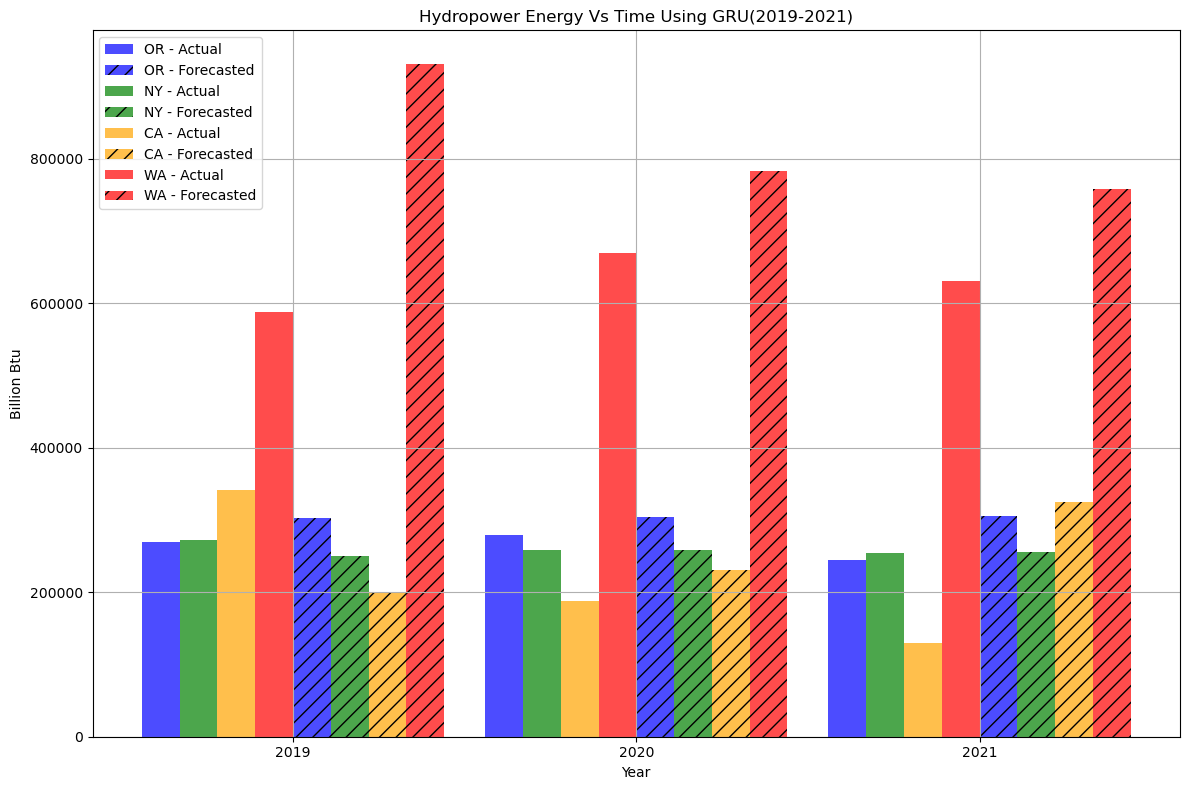

In [35]:
# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Hydropower_T.iloc[-3:]

# list of state abbreviations to plot
state_abbreviations = ['OR', 'NY', 'CA', 'WA']

# Set the width of the bars
bar_width = 0.11

# colors for each state
state_colors = {'OR': 'blue', 'NY': 'green', 'CA': 'orange', 'WA': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(selected_years)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# Add x-labels
plt.xlabel('Year')
# Add y-labels 
plt.ylabel('Billion Btu')
# Add title
plt.title('Hydropower Energy Vs Time Using GRU(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [8]:
# Loop through each selected state
state_mse_dict = {}
state_rmse_dict = {}
state_forecasts_dict = {}  

for state in ['OR', 'NY', 'CA', 'WA']:
    # Extract the data for the selected state
    data = Hydropower.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for GRU
    sequence_length = 30
    sequences, targets = create_sequences(scaled_data, sequence_length)

    # Split data into training and testing sets
    train_size = int(len(sequences) * 0.8)
    x_train, y_train = sequences[:train_size], targets[:train_size]

    # Include data beyond 1969 for training
    x_train_full, y_train_full = sequences[:len(x_train)], targets[:len(y_train)]

    # Create and train a GRU model
    model = Sequential()
    model.add(GRU(128, input_shape=(sequence_length, 1), return_sequences=True))
    model.add(GRU(64, return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', sample_weight_mode="temporal")

    # Initialize sample weights with ones 
    sample_weights = np.ones(train_size)

    # Lists to store forecasts and actual values
    forecasts = []
    actual_values = []

    # Lists to store MSE and RMSE values
    mse_values = []
    rmse_values = []

    # Iterate through the forecast years
    current_sequence = x_train_full[-1]  # Start with the last sequence from the training data
    for year in range(train_size, len(scaled_data)):
        # Make a prediction for the next year
        forecast = model.predict(current_sequence.reshape(1, sequence_length, 1))

        # Update the model with the actual data for the current year
        actual_value = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence.reshape(1, sequence_length, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value)

        # Calculate the mean squared error between the forecast and actual value
        mse = mean_squared_error([actual_value], [forecast[0]])

        # Calculate the root mean squared error between the forecast and actual value
        rmse = np.sqrt(mse)

        # Append MSE and RMSE values to lists
        mse_values.append(mse)
        rmse_values.append(rmse)

        # Update sample weights based on prediction accuracy
        sample_weights = np.append(sample_weights, mse)  # Use MSE for sample weights

        # Re-train the model with updated sample weights
        model.fit(x_train_full, y_train_full, epochs=10, batch_size=1, sample_weight=sample_weights)

        # Update the current sequence
        current_sequence = np.append(current_sequence[1:], forecast[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse > accuracy_threshold:
            continue
        else:
            forecasts.append(forecast[0])
            actual_values.append(actual_value)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))
    actual_values = scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    average_mse = np.mean(mse_values)

    # Calculate the root mean squared error (RMSE) for the forecasts
    average_rmse = np.mean(rmse_values)

    state_mse_dict[state] = average_mse
    state_rmse_dict[state] = average_rmse

    # Forecast for 2022 and 2023
    forecast_2022 = model.predict(current_sequence.reshape(1, sequence_length, 1))
    current_sequence = np.append(current_sequence[1:], forecast_2022[0])
    forecast_2023 = model.predict(current_sequence.reshape(1, sequence_length, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022 = scaler.inverse_transform(forecast_2022.reshape(-1, 1))[0][0]
    forecast_2023 = scaler.inverse_transform(forecast_2023.reshape(-1, 1))[0][0]
    state_forecasts_dict[state] = {'2022': forecast_2022, '2023': forecast_2023}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_dict.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_dict.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_dict.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")


1/1 [==============================] - 1s 1s/step
Epoch 1/10
26/26 [==============================] - 6s 18ms/step - loss: 0.0345
Epoch 2/10
26/26 [==============================] - 1s 21ms/step - loss: 0.0299
Epoch 3/10
26/26 [==============================] - 1s 21ms/step - loss: 0.0357
Epoch 4/10
26/26 [==============================] - 1s 20ms/step - loss: 0.0243
Epoch 5/10
26/26 [==============================] - 1s 20ms/step - loss: 0.0369
Epoch 6/10
26/26 [==============================] - 1s 20ms/step - loss: 0.0282
Epoch 7/10
26/26 [==============================] - 0s 19ms/step - loss: 0.0227
Epoch 8/10
26/26 [==============================] - 1s 23ms/step - loss: 0.0272
Epoch 9/10
26/26 [==============================] - 1s 21ms/step - loss: 0.0377
Epoch 10/10
1/1 [==============================] - 0s 30ms/step
Epoch 1/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0299
Epoch 2/10
27/27 [==============================] - 1s 19ms/step - loss: 0.0217
Epoch 

45/45 [==============================] - 1s 17ms/step - loss: 0.0020
Epoch 2/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 3/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 4/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0025
Epoch 5/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 6/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0019
Epoch 7/10
45/45 [==============================] - 1s 18ms/step - loss: 0.0021
Epoch 8/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0023
Epoch 9/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0023
Epoch 10/10
1/1 [==============================] - 0s 23ms/step
Epoch 1/10
46/46 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 2/10
46/46 [==============================] - 1s 17ms/step - loss: 0.0022
Epoch 3/10
46/46 [==============================] - 1s 17ms/step - 

1/1 [==============================] - 0s 25ms/step
Epoch 1/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0145
Epoch 2/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0123
Epoch 3/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0147
Epoch 4/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0154
Epoch 5/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0149
Epoch 6/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0149
Epoch 7/10
27/27 [==============================] - 0s 17ms/step - loss: 0.0149
Epoch 8/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0167
Epoch 9/10
27/27 [==============================] - 0s 18ms/step - loss: 0.0107
Epoch 10/10
1/1 [==============================] - 0s 24ms/step
Epoch 1/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0160
Epoch 2/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0120
Epoc

1/1 [==============================] - 0s 25ms/step
Epoch 1/10
46/46 [==============================] - 1s 22ms/step - loss: 0.0058
Epoch 2/10
46/46 [==============================] - 1s 19ms/step - loss: 0.0054
Epoch 3/10
46/46 [==============================] - 1s 19ms/step - loss: 0.0056
Epoch 4/10
46/46 [==============================] - 1s 19ms/step - loss: 0.0047
Epoch 5/10
46/46 [==============================] - 1s 18ms/step - loss: 0.0043
Epoch 6/10
46/46 [==============================] - 1s 20ms/step - loss: 0.0050
Epoch 7/10
46/46 [==============================] - 1s 21ms/step - loss: 0.0066
Epoch 8/10
46/46 [==============================] - 1s 24ms/step - loss: 0.0040
Epoch 9/10
46/46 [==============================] - 1s 21ms/step - loss: 0.0038
Epoch 10/10
1/1 [==============================] - 0s 33ms/step
Epoch 1/10
47/47 [==============================] - 1s 26ms/step - loss: 0.0037
Epoch 2/10
47/47 [==============================] - 1s 21ms/step - loss: 0.0037
Epoc

27/27 [==============================] - 0s 18ms/step - loss: 0.0389
Epoch 8/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0369
Epoch 9/10
27/27 [==============================] - 1s 22ms/step - loss: 0.0353
Epoch 10/10
1/1 [==============================] - 0s 38ms/step
Epoch 1/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0362
Epoch 2/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0349
Epoch 3/10
28/28 [==============================] - 1s 18ms/step - loss: 0.0362
Epoch 4/10
28/28 [==============================] - 1s 19ms/step - loss: 0.0357
Epoch 5/10
28/28 [==============================] - 1s 19ms/step - loss: 0.0362
Epoch 6/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0420
Epoch 7/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0346
Epoch 8/10
28/28 [==============================] - 0s 17ms/step - loss: 0.0363
Epoch 9/10
28/28 [==============================] - 1s 18ms/step - 

46/46 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 9/10
46/46 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 10/10
1/1 [==============================] - 0s 31ms/step
Epoch 1/10
47/47 [==============================] - 1s 19ms/step - loss: 0.0013
Epoch 2/10
47/47 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 3/10
47/47 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 4/10
47/47 [==============================] - 1s 22ms/step - loss: 0.0014
Epoch 5/10
47/47 [==============================] - 1s 23ms/step - loss: 0.0020
Epoch 6/10
47/47 [==============================] - 1s 24ms/step - loss: 0.0026
Epoch 7/10
47/47 [==============================] - 1s 23ms/step - loss: 0.0059
Epoch 8/10
47/47 [==============================] - 1s 21ms/step - loss: 0.0092
Epoch 9/10
47/47 [==============================] - 1s 18ms/step - loss: 0.0025
Epoch 10/10
1/1 [==============================] - 0s 25ms/step
Epo

28/28 [==============================] - 1s 18ms/step - loss: 0.0233
Epoch 8/10
28/28 [==============================] - 1s 17ms/step - loss: 0.0219
Epoch 9/10
28/28 [==============================] - 0s 18ms/step - loss: 0.0308
Epoch 10/10
1/1 [==============================] - 0s 21ms/step
Epoch 1/10
29/29 [==============================] - 1s 17ms/step - loss: 0.0220
Epoch 2/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0232
Epoch 3/10
29/29 [==============================] - 1s 17ms/step - loss: 0.0243
Epoch 4/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0221
Epoch 5/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0265
Epoch 6/10
29/29 [==============================] - 0s 17ms/step - loss: 0.0215
Epoch 7/10
29/29 [==============================] - 1s 17ms/step - loss: 0.0214
Epoch 8/10
29/29 [==============================] - 1s 18ms/step - loss: 0.0221
Epoch 9/10
29/29 [==============================] - 1s 17ms/step - 

47/47 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 9/10
47/47 [==============================] - 1s 17ms/step - loss: 0.0016
Epoch 10/10
1/1 [==============================] - 0s 22ms/step
Epoch 1/10
48/48 [==============================] - 1s 16ms/step - loss: 0.0034
Epoch 2/10
48/48 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 3/10
48/48 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 4/10
48/48 [==============================] - 1s 17ms/step - loss: 0.0014
Epoch 5/10
48/48 [==============================] - 1s 17ms/step - loss: 0.0012
Epoch 6/10
48/48 [==============================] - 1s 21ms/step - loss: 0.0012
Epoch 7/10
48/48 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 8/10
48/48 [==============================] - 1s 17ms/step - loss: 0.0011
Epoch 9/10
48/48 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 10/10
1/1 [==============================] - 0s 16ms/step
Epo

### CNN

In [22]:
# sequence length and threshold Accuracy
sequence_length_cnn = 50
accuracy_threshold_cnn = 0.01  

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {} 

for state in ['OR', 'NY', 'CA', 'WA']:
    # Extract the data for the selected state
    data = Hydropower.loc[state].values
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)
    # training dataset for sequential learning
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]
    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')
    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []
    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])
        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)
            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)
    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))
    # Calculate the MSE
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)
    # Calculate the RMSE
    rmse_cnn = np.sqrt(mse_cnn)
    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn
    # Forecast for 2022
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    # Forecast for 2023
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    # Inverse transform the forecasts to the original scale for 2022
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the forecasts to the original scale for 2023
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}
    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}
# Print MSE for selected states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}") 
# Print RMSE for selected states
print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")
# Print forecasts for selected states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")
# Print predictions for 2019, 2020, and 2021 for selected states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")
# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}
for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Hydropower.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state
# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 534ms/step
Epoch 1/20
13/13 [==============================] - 3s 6ms/step - loss: 0.0907
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0267
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0274
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0296
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0199
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0159
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0157
Epoch 9/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 10/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 11/20
13/13 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 12/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0

22/22 [==============================] - 0s 6ms/step - loss: 0.0056
Epoch 20/20
1/1 [==============================] - 0s 77ms/step
Epoch 1/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0171
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 3/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 7/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 8/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 9/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 10/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 11/20
23/23 [==============================] - 0s 6ms/step - loss: 0.00

32/32 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 18/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 19/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 20/20
1/1 [==============================] - 0s 83ms/step
Epoch 1/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 2/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 3/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 4/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 5/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 6/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 7/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 8/20
33/33 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 9/20
33/33 [==============================] - 0s 6ms/step - loss: 0.00

42/42 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 16/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 17/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 18/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0027
Epoch 19/20
42/42 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 20/20
1/1 [==============================] - 0s 48ms/step
Epoch 1/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 2/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 3/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 4/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0022
Epoch 5/20
43/43 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 6/20
43/43 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 7/20
43/43 [==============================] - 0s 5ms/step - loss: 0.

52/52 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 14/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 15/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 16/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 17/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 18/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 19/20
52/52 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 20/20
1/1 [==============================] - 0s 81ms/step
Epoch 1/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 2/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 3/20
53/53 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 4/20
53/53 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 5/20
53/53 [==============================] - 0s 5ms/step - loss: 

62/62 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 12/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 13/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 14/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 15/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 16/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 17/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 18/20
62/62 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 19/20
62/62 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 20/20
1/1 [==============================] - 0s 268ms/step
Epoch 1/20
13/13 [==============================] - 3s 6ms/step - loss: 0.0951
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0218
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - los

22/22 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 7/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 8/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 9/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 10/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 11/20
22/22 [==============================] - 0s 7ms/step - loss: 9.8634e-04
Epoch 12/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 13/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0023
Epoch 14/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 15/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 16/20
22/22 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 17/20
22/22 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 18/20
22/22 [==============================] 

32/32 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 4/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0010
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: 8.9977e-04
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: 9.1193e-04
Epoch 8/20
32/32 [==============================] - 0s 7ms/step - loss: 8.8009e-04
Epoch 9/20
32/32 [==============================] - 0s 7ms/step - loss: 9.6745e-04
Epoch 10/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 11/20
32/32 [==============================] - 0s 7ms/step - loss: 9.9215e-04
Epoch 12/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 13/20
32/32 [==============================] - 0s 7ms/step - loss: 9.8222e-04
Epoch 14/20
32/32 [==============================] - 0s 6ms/step - loss: 9.5009e-04
Epoch 15/20
32/32 [===========

41/41 [==============================] - 0s 7ms/step - loss: 7.4185e-04
Epoch 17/20
41/41 [==============================] - 0s 7ms/step - loss: 7.3725e-04
Epoch 18/20
41/41 [==============================] - 0s 7ms/step - loss: 9.1333e-04
Epoch 19/20
41/41 [==============================] - 0s 7ms/step - loss: 8.5024e-04
Epoch 20/20
1/1 [==============================] - 0s 82ms/step
Epoch 1/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 2/20
42/42 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 3/20
42/42 [==============================] - 0s 7ms/step - loss: 9.0476e-04
Epoch 4/20
42/42 [==============================] - 0s 6ms/step - loss: 7.5580e-04
Epoch 5/20
42/42 [==============================] - 0s 7ms/step - loss: 8.6341e-04
Epoch 6/20
42/42 [==============================] - 0s 7ms/step - loss: 9.6259e-04
Epoch 7/20
42/42 [==============================] - 0s 7ms/step - loss: 7.7960e-04
Epoch 8/20
42/42 [=====================

51/51 [==============================] - 0s 6ms/step - loss: 5.9470e-04
Epoch 7/20
51/51 [==============================] - 0s 7ms/step - loss: 5.2507e-04
Epoch 8/20
51/51 [==============================] - 0s 6ms/step - loss: 5.4270e-04
Epoch 9/20
51/51 [==============================] - 0s 6ms/step - loss: 6.4709e-04
Epoch 10/20
51/51 [==============================] - 0s 6ms/step - loss: 6.1346e-04
Epoch 11/20
51/51 [==============================] - 0s 7ms/step - loss: 6.0686e-04
Epoch 12/20
51/51 [==============================] - 0s 6ms/step - loss: 7.4476e-04
Epoch 13/20
51/51 [==============================] - 0s 6ms/step - loss: 6.4171e-04
Epoch 14/20
51/51 [==============================] - 0s 7ms/step - loss: 8.2119e-04
Epoch 15/20
51/51 [==============================] - 0s 7ms/step - loss: 6.3753e-04
Epoch 16/20
51/51 [==============================] - 0s 6ms/step - loss: 8.0737e-04
Epoch 17/20
51/51 [==============================] - 0s 7ms/step - loss: 6.3130e-04
Epoch 1

56/56 [==============================] - 0s 4ms/step - loss: 6.4008e-04
Epoch 2/20
56/56 [==============================] - 0s 4ms/step - loss: 5.5562e-04
Epoch 3/20
56/56 [==============================] - 0s 7ms/step - loss: 6.5696e-04
Epoch 4/20
56/56 [==============================] - 0s 4ms/step - loss: 6.2593e-04
Epoch 5/20
56/56 [==============================] - 0s 4ms/step - loss: 6.7457e-04
Epoch 6/20
56/56 [==============================] - 0s 4ms/step - loss: 5.8814e-04
Epoch 7/20
56/56 [==============================] - 0s 4ms/step - loss: 5.7786e-04
Epoch 8/20
56/56 [==============================] - 0s 4ms/step - loss: 7.5644e-04
Epoch 9/20
56/56 [==============================] - 0s 4ms/step - loss: 5.6806e-04
Epoch 10/20
56/56 [==============================] - 0s 4ms/step - loss: 5.6840e-04
Epoch 11/20
56/56 [==============================] - 0s 4ms/step - loss: 6.7032e-04
Epoch 12/20
56/56 [==============================] - 0s 4ms/step - loss: 4.5123e-04
Epoch 13/20


15/15 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 11/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 12/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0079
Epoch 13/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 14/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 15/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 16/20
15/15 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 17/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0088
Epoch 18/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 19/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 20/20
1/1 [==============================] - 0s 55ms/step
Epoch 1/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - los

25/25 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 11/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 12/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 13/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0050
Epoch 14/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 15/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 16/20
25/25 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 17/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 18/20
25/25 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 19/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 20/20
1/1 [==============================] - 0s

35/35 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 7/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 8/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 9/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 10/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 11/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 12/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 13/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 14/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 15/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 16/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 17/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 18/20
35/35 [==============================] - 0s

45/45 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 5/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 7/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 8/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 9/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 10/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 11/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 12/20
45/45 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 13/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 14/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 15/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 16/20
45/45 [==============================] - 0s 5

55/55 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 3/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 4/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 5/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 6/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 7/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 8/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 9/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 10/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 11/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 12/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 13/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 14/20
55/55 [==============================] - 0s 4ms

14/14 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 19/20
14/14 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 4/20
15/15 [==============================] - 0s 5ms/step - loss: 0.0109
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 9/20
15/15 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 10/20
15/15 [==============================] - 0s 5ms/step - loss: 0.00

24/24 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 17/20
24/24 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 18/20
24/24 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 19/20
24/24 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 20/20
1/1 [==============================] - 0s 44ms/step
Epoch 1/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 6/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 8/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0

34/34 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 15/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 16/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 17/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 18/20
34/34 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 19/20
34/34 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 20/20
1/1 [==============================] - 0s 48ms/step
Epoch 1/20
35/35 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 2/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 3/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 4/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 5/20
35/35 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 6/20
35/35 [==============================] - 0s 4ms/step - loss: 0

44/44 [==============================] - 0s 4ms/step - loss: 9.8532e-04
Epoch 12/20
44/44 [==============================] - 0s 5ms/step - loss: 9.1602e-04
Epoch 13/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 14/20
44/44 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 15/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 16/20
44/44 [==============================] - 0s 4ms/step - loss: 8.6004e-04
Epoch 17/20
44/44 [==============================] - 0s 4ms/step - loss: 9.1572e-04
Epoch 18/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 19/20
44/44 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 20/20
1/1 [==============================] - 0s 44ms/step
Epoch 1/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 2/20
45/45 [==============================] - 0s 4ms/step - loss: 9.1616e-04
Epoch 3/20
45/45 [==============================] 

54/54 [==============================] - 0s 6ms/step - loss: 9.8806e-04
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 5/20
54/54 [==============================] - 0s 5ms/step - loss: 9.4119e-04
Epoch 6/20
54/54 [==============================] - 0s 6ms/step - loss: 8.9153e-04
Epoch 7/20
54/54 [==============================] - 0s 6ms/step - loss: 8.5293e-04
Epoch 8/20
54/54 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 9/20
54/54 [==============================] - 0s 6ms/step - loss: 9.0090e-04
Epoch 10/20
54/54 [==============================] - 0s 6ms/step - loss: 7.3754e-04
Epoch 11/20
54/54 [==============================] - 0s 6ms/step - loss: 7.4284e-04
Epoch 12/20
54/54 [==============================] - 0s 6ms/step - loss: 7.8169e-04
Epoch 13/20
54/54 [==============================] - 0s 4ms/step - loss: 7.5330e-04
Epoch 14/20
54/54 [==============================] - 0s 6ms/step - loss: 7.2879e-04
Epoch 15/20
54/54 

### BAR GRAPH

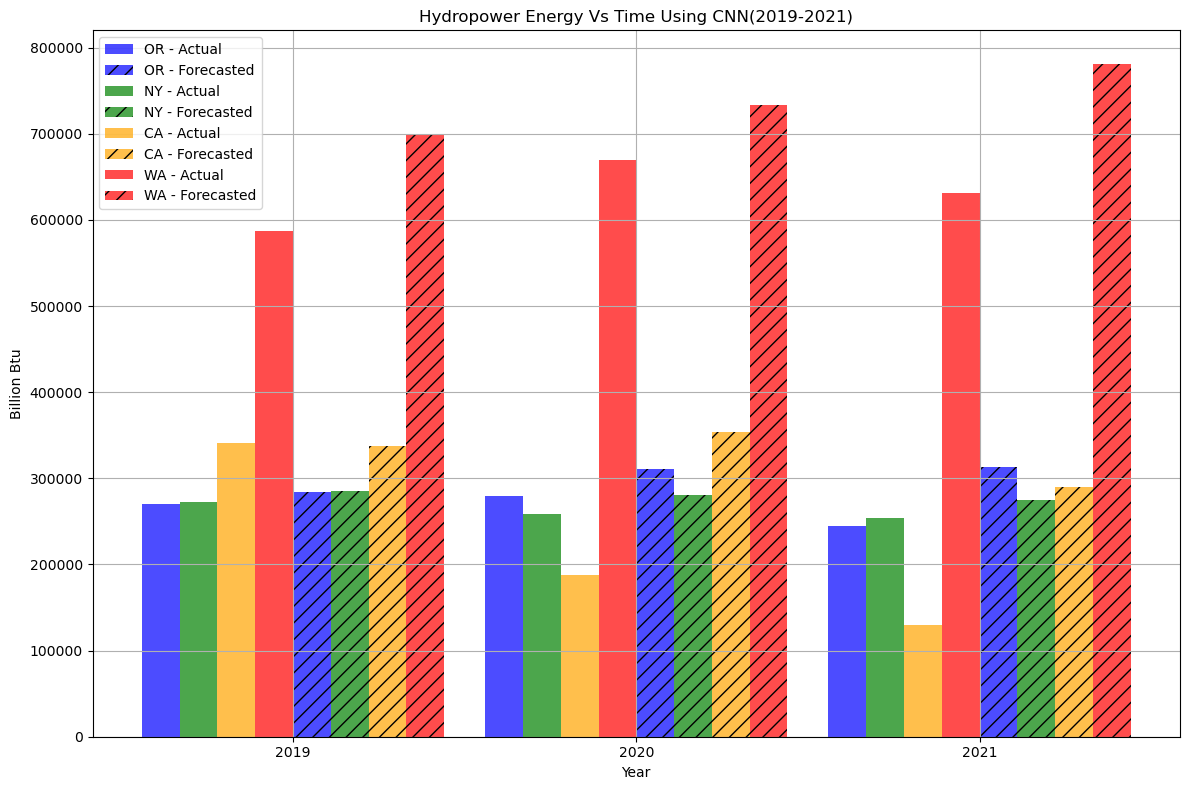

In [34]:
# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Hydropower_T.iloc[-3:]

# list of state abbreviations to plot
state_abbreviations = ['OR', 'NY', 'CA', 'WA']

# Set the width of the bars
bar_width = 0.11

# colors for each state
state_colors = {'OR': 'blue', 'NY': 'green', 'CA': 'orange', 'WA': 'red'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(selected_years)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Hydropower Energy Vs Time Using CNN(2019-2021)')

# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [8]:
# sequence length 
sequence_length_cnn = 40
# threshold
accuracy_threshold_cnn = 0.01 

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  \

for state in ['OR', 'NY', 'CA', 'WA']:
    # Extract the data for the states
    data = Hydropower.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)

    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022 and 2023
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Hydropower.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 113ms/step
Epoch 1/20
23/23 [==============================] - 1s 5ms/step - loss: 0.1032
Epoch 2/20
23/23 [==============================] - 0s 5ms/step - loss: 0.0401
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0266
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0323
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0284
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0287
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0257
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0262
Epoch 12/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0

32/32 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 20/20
1/1 [==============================] - 0s 44ms/step
Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0125
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 5/20
33/33 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 7/20
33/33 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 8/20
33/33 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 11/20
33/33 [==============================] - 0s 2ms/step - loss: 0.00

42/42 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 18/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 19/20
42/42 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 20/20
1/1 [==============================] - 0s 51ms/step
Epoch 1/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 2/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 3/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 4/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 5/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 7/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 8/20
43/43 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 9/20
43/43 [==============================] - 0s 3ms/step - loss: 0.00

52/52 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 16/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 17/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 18/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 19/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 3/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 4/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 5/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 6/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 7/20
53/53 [==============================] - 0s 2ms/step - loss: 0.

62/62 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 14/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 15/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 16/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 17/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 18/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 19/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 20/20
1/1 [==============================] - 0s 66ms/step
Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 0.0405
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 

32/32 [==============================] - 0s 2ms/step - loss: 8.5236e-04
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 4.7225e-04
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 4.9725e-04
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 3.9467e-04
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 5.3734e-04
Epoch 8/20
32/32 [==============================] - 0s 3ms/step - loss: 4.8630e-04
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 6.4206e-04
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 8.7878e-04
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 6.7138e-04
Epoch 13/20
32/32 [==============================] - 0s 3ms/step - loss: 6.2626e-04
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 4.3606e-04
Epoch 15/20
32

Epoch 19/20
36/36 [==============================] - 0s 3ms/step - loss: 4.0183e-04
Epoch 20/20
1/1 [==============================] - 0s 23ms/step
Epoch 1/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 2/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 3/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 4/20
37/37 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: 7.4523e-04
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 4.7213e-04
Epoch 7/20
37/37 [==============================] - 0s 2ms/step - loss: 6.2922e-04
Epoch 8/20
37/37 [==============================] - 0s 2ms/step - loss: 3.2636e-04
Epoch 9/20
37/37 [==============================] - 0s 2ms/step - loss: 3.0842e-04
Epoch 10/20
37/37 [==============================] - 0s 2ms/step - loss: 2.5206e-04
Epoch 11/20
37/37 [==================

46/46 [==============================] - 0s 3ms/step - loss: 2.8896e-04
Epoch 10/20
46/46 [==============================] - 0s 2ms/step - loss: 2.2896e-04
Epoch 11/20
46/46 [==============================] - 0s 3ms/step - loss: 2.1315e-04
Epoch 12/20
46/46 [==============================] - 0s 2ms/step - loss: 3.5641e-04
Epoch 13/20
46/46 [==============================] - 0s 2ms/step - loss: 2.3500e-04
Epoch 14/20
46/46 [==============================] - 0s 2ms/step - loss: 1.6995e-04
Epoch 15/20
46/46 [==============================] - 0s 2ms/step - loss: 1.6601e-04
Epoch 16/20
46/46 [==============================] - 0s 2ms/step - loss: 2.9376e-04
Epoch 17/20
46/46 [==============================] - 0s 2ms/step - loss: 2.0461e-04
Epoch 18/20
46/46 [==============================] - 0s 2ms/step - loss: 1.8479e-04
Epoch 19/20
46/46 [==============================] - 0s 2ms/step - loss: 2.6399e-04
Epoch 20/20
1/1 [==============================] - 0s 19ms/step
Epoch 1/20
47/47 [======

55/55 [==============================] - 0s 3ms/step - loss: 1.2150e-04
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
56/56 [==============================] - 0s 3ms/step - loss: 2.5508e-04
Epoch 2/20
56/56 [==============================] - 0s 3ms/step - loss: 2.2943e-04
Epoch 3/20
56/56 [==============================] - 0s 3ms/step - loss: 1.9537e-04
Epoch 4/20
56/56 [==============================] - 0s 3ms/step - loss: 2.5825e-04
Epoch 5/20
56/56 [==============================] - 0s 3ms/step - loss: 3.3346e-04
Epoch 6/20
56/56 [==============================] - 0s 3ms/step - loss: 1.7554e-04
Epoch 7/20
56/56 [==============================] - 0s 3ms/step - loss: 1.2208e-04
Epoch 8/20
56/56 [==============================] - 0s 3ms/step - loss: 1.9182e-04
Epoch 9/20
56/56 [==============================] - 0s 3ms/step - loss: 4.1940e-04
Epoch 10/20
56/56 [==============================] - 0s 3ms/step - loss: 4.5192e-04
Epoch 11/20
56/56 [==============

25/25 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.0205
Epoch 11/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 12/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 13/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 14/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0278
Epoch 15/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0218
Epoch 16/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 17/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 18/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0163
Epoch 19/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 20/20
1/1 [==============================] - 0s

35/35 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 7/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 8/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 9/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 10/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 11/20
35/35 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 12/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 13/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 14/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 15/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 16/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 17/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 18/20
35/35 [==============================] - 0s

45/45 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 6/20
45/45 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 7/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 8/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 9/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 10/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 11/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 12/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 13/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 14/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 15/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 16/20
45/45 [==============================] - 0s 2

55/55 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 3/20
55/55 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 5/20
55/55 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 8/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 9/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 11/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 13/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 14/20
55/55 [==============================] - 0s 3ms

24/24 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 19/20
24/24 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.00

34/34 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 17/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 18/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 19/20
34/34 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 3/20
35/35 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 4/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 6/20
35/35 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 7/20
35/35 [==============================] - 0s 1ms/step - loss: 0.0034
Epoch 8/20
35/35 [==============================] - 0s 2ms/step - loss: 0.0

44/44 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 15/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 16/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 17/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 18/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 19/20
44/44 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 20/20
1/1 [==============================] - 0s 31ms/step
Epoch 1/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 2/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 3/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 4/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 5/20
45/45 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 6/20
45/45 [==============================] - 0s 2ms/step - loss: 0

54/54 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 13/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 14/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 15/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 16/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 17/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 18/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 19/20
54/54 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss:

In [10]:
# Loop through each selected state
state_mse_dict = {}
state_rmse_dict = {}
state_forecasts_dict = {} 

for state in ['OR', 'NY', 'CA', 'WA']:
    # Extract the data for the selected state
    data = Hydropower.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequence_length = 30
    sequences, targets = create_sequences(scaled_data, sequence_length)

    # Split data into training and testing sets
    train_size = int(len(sequences) * 0.8)
    x_train, y_train = sequences[:train_size], targets[:train_size]

    # Include data beyond 1969 for training
    x_train_full, y_train_full = sequences[:len(x_train)], targets[:len(y_train)]

    # Create and train a 1D CNN model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', sample_weight_mode="temporal")

    # Initialize sample weights with ones 
    sample_weights = np.ones(train_size)

    # Lists to store forecasts and actual values
    forecasts = []
    actual_values = []

    # Lists to store MSE and RMSE values
    mse_values = []
    rmse_values = []

    # Iterate through the forecast years
    current_sequence = x_train_full[-1]  # Start with the last sequence from the training data
    for year in range(train_size, len(scaled_data)):
        # Make a prediction for the next year
        forecast = model.predict(current_sequence.reshape(1, sequence_length, 1))

        # Update the model with the actual data for the current year
        actual_value = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence.reshape(1, sequence_length, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value)

        # Calculate the mean squared error between the forecast and actual value
        mse = mean_squared_error([actual_value], [forecast[0]])

        # Calculate the root mean squared error between the forecast and actual value
        rmse = np.sqrt(mse)

        # Append MSE and RMSE values to lists
        mse_values.append(mse)
        rmse_values.append(rmse)

        # Update sample weights based on prediction accuracy
        sample_weights = np.append(sample_weights, mse)  # Use MSE for sample weights

        # Re-train the model with updated sample weights
        model.fit(x_train_full, y_train_full, epochs=10, batch_size=1, sample_weight=sample_weights)

        # Update the current sequence
        current_sequence = np.append(current_sequence[1:], forecast[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse > accuracy_threshold:
            continue
        else:
            forecasts.append(forecast[0])
            actual_values.append(actual_value)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))
    actual_values = scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    average_mse = np.mean(mse_values)

    # Calculate the root mean squared error (RMSE) for the forecasts
    average_rmse = np.mean(rmse_values)

    state_mse_dict[state] = average_mse
    state_rmse_dict[state] = average_rmse

    # Forecast for 2022 and 2023
    forecast_2022 = model.predict(current_sequence.reshape(1, sequence_length, 1))
    current_sequence = np.append(current_sequence[1:], forecast_2022[0])
    forecast_2023 = model.predict(current_sequence.reshape(1, sequence_length, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022 = scaler.inverse_transform(forecast_2022.reshape(-1, 1))[0][0]
    forecast_2023 = scaler.inverse_transform(forecast_2023.reshape(-1, 1))[0][0]
    state_forecasts_dict[state] = {'2022': forecast_2022, '2023': forecast_2023}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_dict.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_dict.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_dict.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")


1/1 [==============================] - 0s 100ms/step
Epoch 1/10
26/26 [==============================] - 1s 3ms/step - loss: 0.0530
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0314
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 5/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 6/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0197
Epoch 7/10
26/26 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 8/10
26/26 [==============================] - 0s 4ms/step - loss: 0.0126
Epoch 9/10
26/26 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 10/10
1/1 [==============================] - 0s 23ms/step
Epoch 1/10
27/27 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 3/10
27/

Epoch 8/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 9/10
35/35 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch 1/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 2/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 3/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 4/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 5/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 7/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 9/10
36/36 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 10/10
1/1 [==============================] - 0s 19ms/step
Epo

54/54 [==============================] - 0s 3ms/step - loss: 9.2618e-04
Epoch 10/10
1/1 [==============================] - 0s 20ms/step
Epoch 1/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 9.2674e-04
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 9.8848e-04
Epoch 8/10
55/55 [==============================] - 0s 3ms/step - loss: 8.6989e-04
Epoch 9/10
55/55 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch 1/10
56/56 [==============================] - 0s 2ms/step - loss: 7.402

36/36 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch 1/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 2/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 4/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 5/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 6/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 7/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 8/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 10/10
1/1 [==============================] - 0s 19ms/step
Epoch 1/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 2/10
38/

1/1 [==============================] - 0s 18ms/step
Epoch 1/10
56/56 [==============================] - 0s 3ms/step - loss: 9.4276e-04
Epoch 2/10
56/56 [==============================] - 0s 4ms/step - loss: 6.4453e-04
Epoch 3/10
56/56 [==============================] - 0s 4ms/step - loss: 7.8918e-04
Epoch 4/10
56/56 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 5/10
56/56 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 6/10
56/56 [==============================] - 0s 4ms/step - loss: 7.3565e-04
Epoch 7/10
56/56 [==============================] - 0s 3ms/step - loss: 8.7198e-04
Epoch 8/10
56/56 [==============================] - 0s 3ms/step - loss: 7.1223e-04
Epoch 9/10
56/56 [==============================] - 0s 3ms/step - loss: 8.5952e-04
Epoch 10/10
1/1 [==============================] - 0s 19ms/step
Epoch 1/10
57/57 [==============================] - 0s 4ms/step - loss: 8.6817e-04
Epoch 2/10
57/57 [==============================] - 0s 4ms/ste

37/37 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 10/10
1/1 [==============================] - 0s 19ms/step
Epoch 1/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 10/10
1/1 [==============================] - 0s 20ms/step
Epoch 1/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 2/10
39/

1/1 [==============================] - 0s 13ms/step
Epoch 1/10
57/57 [==============================] - 0s 3ms/step - loss: 7.4855e-04
Epoch 2/10
57/57 [==============================] - 0s 3ms/step - loss: 7.2517e-04
Epoch 3/10
57/57 [==============================] - 0s 3ms/step - loss: 8.0383e-04
Epoch 4/10
57/57 [==============================] - 0s 3ms/step - loss: 9.0755e-04
Epoch 5/10
57/57 [==============================] - 0s 3ms/step - loss: 6.8843e-04
Epoch 6/10
57/57 [==============================] - 0s 3ms/step - loss: 7.3305e-04
Epoch 7/10
57/57 [==============================] - 0s 2ms/step - loss: 7.8974e-04
Epoch 8/10
57/57 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 9/10
57/57 [==============================] - 0s 2ms/step - loss: 8.8996e-04
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch 1/10
58/58 [==============================] - 0s 2ms/step - loss: 7.5682e-04
Epoch 2/10
58/58 [==============================] - 0s 2ms

38/38 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch 1/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 2/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 3/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 4/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 5/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 6/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 7/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 8/10
39/39 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 6.4851e-04
Epoch 10/10
1/1 [==============================] - 0s 18ms/step
Epoch 1/10

57/57 [==============================] - 0s 3ms/step - loss: 2.0837e-04
Epoch 6/10
57/57 [==============================] - 0s 3ms/step - loss: 1.5972e-04
Epoch 7/10
57/57 [==============================] - 0s 3ms/step - loss: 1.6124e-04
Epoch 8/10
57/57 [==============================] - 0s 3ms/step - loss: 2.3508e-04
Epoch 9/10
57/57 [==============================] - 0s 3ms/step - loss: 3.5500e-04
Epoch 10/10
1/1 [==============================] - 0s 19ms/step
Epoch 1/10
58/58 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 2/10
58/58 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 3/10
58/58 [==============================] - 0s 2ms/step - loss: 6.0075e-04
Epoch 4/10
58/58 [==============================] - 0s 3ms/step - loss: 2.6183e-04
Epoch 5/10
58/58 [==============================] - 0s 3ms/step - loss: 1.5615e-04
Epoch 6/10
58/58 [==============================] - 0s 3ms/step - loss: 2.2408e-04
Epoch 7/10
58/58 [========================

## Machine Learning Forecasting

### ARIMA

In [16]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    # split the training data
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    # model 
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    # forecast value
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    # mse and rmse 
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    # Forecasting 
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['OR', 'NY', 'CA', 'WA']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Hydropower.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    # arima accuracy dictanary 
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }

    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")



# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")

2022: 335301.29
2023: 330497.59
Accuracy for OR (ARIMA) - 2019: 79.26%
Accuracy for OR (ARIMA) - 2020: 73.19%
Accuracy for OR (ARIMA) - 2021: 82.10
2022: 266778.31
2023: 270969.02
Accuracy for NY (ARIMA) - 2019: 98.49%
Accuracy for NY (ARIMA) - 2020: 99.98%
Accuracy for NY (ARIMA) - 2021: 96.50
2022: 283479.51
2023: 290659.33
Accuracy for CA (ARIMA) - 2019: 86.20%
Accuracy for CA (ARIMA) - 2020: 90.32%
Accuracy for CA (ARIMA) - 2021: 81.94
2022: 763218.02
2023: 762921.17
Accuracy for WA (ARIMA) - 2019: 69.67%
Accuracy for WA (ARIMA) - 2020: 71.68%
Accuracy for WA (ARIMA) - 2021: 71.97

Forecasted Values for 2022 and 2023 (ARIMA):
Forecasts for 2022:
OR: 335301.29
NY: 266778.31
CA: 283479.51
WA: 763218.02
Forecasts for 2023:
OR: 330497.59
NY: 270969.02
CA: 290659.33
WA: 762921.17

Mean Squared Error (MSE) for All states:
MSE for OR (ARIMA): 2207281791.84
MSE for NY (ARIMA): 348266632.53
MSE for CA (ARIMA): 9020889429.36
MSE for WA (ARIMA): 7905914664.34

Root Mean Squared Error (RMSE) f

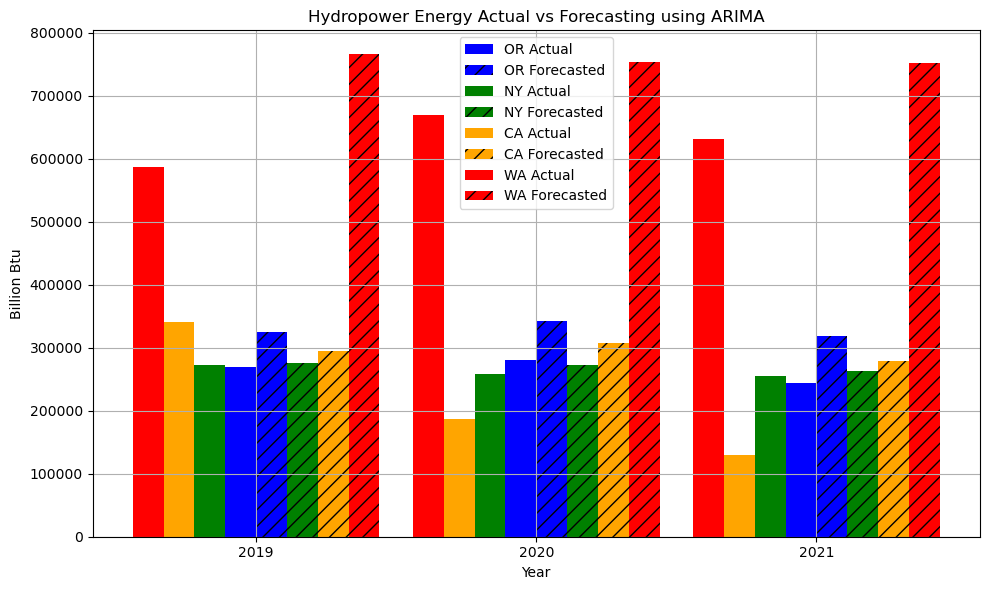

In [13]:
# colors for each state
state_colors = {'OR': 'blue', 'NY': 'green', 'CA': 'orange', 'WA': 'red'}

# Create a figure
plt.figure(figsize=(10, 6))

# width of the bars 
bar_width = 0.11
# space between bar groups
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Hydropower.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# Add x-labels
plt.xlabel('Year')
# Add y-labels 
plt.ylabel('Billion Btu')
# Add title
plt.title('Hydropower Energy Actual vs Forecasting using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Create the initial DataFrame
df_combined_results = pd.DataFrame({
    'State': list(mse_arima_dict.keys()),
    'MSE_lstm': list(state_mse_lstm.values()),
    'RMSE_lstm': list(state_rmse_lstm.values()),
    'Forecast_2022_lstm': [state_forecasts_lstm[state]['2022'] for state in state_forecasts_lstm],
    'Forecast_2023_lstm': [state_forecasts_lstm[state]['2023'] for state in state_forecasts_lstm],
    'MSE_cnn': list(state_mse_cnn.values()),
    'RMSE_cnn': list(state_rmse_cnn.values()),
    'Forecast_2022_cnn': [state_forecasts_cnn[state]['2022'] for state in state_forecasts_cnn],
    'Forecast_2023_cnn': [state_forecasts_cnn[state]['2023'] for state in state_forecasts_cnn],
    'MSE_gru': list(state_mse_gru.values()),
    'RMSE_gru': list(state_rmse_gru.values()),
    'Forecast_2022_gru': [state_forecasts_gru[state]['2022'] for state in state_forecasts_gru],
    'Forecast_2023_gru': [state_forecasts_gru[state]['2023'] for state in state_forecasts_gru],
    'MSE_arima': [mse_arima_dict[state] for state in selected_states],
    'RMSE_arima': [rmse_arima_dict[state] for state in selected_states],
    'Forecast_2022_arima': [forecast_years_arima_dict[state][2][0] for state in selected_states],
    'Forecast_2023_arima': [forecast_years_arima_dict[state][3][0] for state in selected_states],
})
# Save the combined DataFrame to a CSV file
df_combined_results.to_csv('combined_results_hydrogen.csv', index=False)